# UK ACCIDENT DATA (2020) ANALYSIS

This code analyses 2020 UK accident data from the Department of Transport to explore the trends associated
with the factors involved in road traffic accidents. The analysis includes performing association
mining using the Apriori algorithm. Clustering analysis (using the KMeans algorithm) will also be
carried out on specific regions in Humberside to determine patterns associated with accidents in
each region. Finally, a predictive model will be developed using Random Forest to predict fatal
injuries sustained in road traffic accidents.

#### Import necessary libraries

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Load the data (tables) from the database

In [2]:
con = sqlite3.connect('accident_data_v1.0.0_2023.db')

In [3]:
pd.set_option('max_colwidth', None)

In [4]:
query = 'SELECT * FROM accident WHERE accident_year = 2020'
accident = pd.read_sql(query, con)
accident

accident_index  accident_year accident_reference  location_easting_osgr  \
0      2020010219808           2020          010219808               521389.0   
1      2020010220496           2020          010220496               529337.0   
2      2020010228005           2020          010228005               526432.0   
3      2020010228006           2020          010228006               538676.0   
4      2020010228011           2020          010228011               529324.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
0                    175144.0  -0.254001  51.462262             1   
1                    176237.0  -0.139253  51.470327             1   
2                    182761.0  -0.178719  51.529614             1   
3                    184371.0  -0.001683  51.541210             1   
4                    181286.0  -0.137592  51.515704             1   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  ...  \
0                      3                   1  ...   
1                      3                   1  ...   
2                      3                   1  ...   
3                      2                   1  ...   
4                      3                   1  ...   
...                  ...                 ...  ...   
91194                  2                   2  ...   
91195                  3                   1  ...   
91196                  2                   2  ...   
91197                  3                   2  ...   
91198                  3                   1  ...   

       pedestrian_crossing_physical_facilities light_conditions  \
0                                            9                1   
1                                            4                1   
2                                            0                4   
3                                            4                4   
4                                            0                4   
...                                        ...              ...   
91194                                        0                1   
91195                                        0                1   
91196                                        0                1   
91197                                        0                1   
91198                                        0                1   

       weather_conditions road_surface_conditions  special_conditions_at_site  \
0                       9                       9                           0   
1                       1                       1                           0   
2                       1                       2                           0   
3                       1                       1                           0   
4                       1                       1                           0   
...                   ...                     ...                         ...   
91194                   1                       1                           0   
91195                   1                       1                           0   
91196                   1        

In [5]:
query = 'SELECT * FROM vehicle WHERE accident_year = 2020'
vehicle = pd.read_sql(query, con)

In [6]:
vehicle

vehicle_index accident_index  accident_year accident_reference  \
0              681716  2020010219808           2020          010219808   
1              681717  2020010220496           2020          010220496   
2              681718  2020010228005           2020          010228005   
3              681719  2020010228006           2020          010228006   
4              681720  2020010228011           2020          010228011   
...               ...            ...            ...                ...   
167370         849086  2020991030297           2020          991030297   
167371         849087  2020991030297           2020          991030297   
167372         849088  2020991030900           2020          991030900   
167373         849089  2020991030900           2020          991030900   
167374         849090  2020991032575           2020          991032575   

        vehicle_reference  vehicle_type  towing_and_articulation  \
0                       1             9                        9   
1                       1             9                        0   
2                       1             9                        0   
3                       1             8                        0   
4                       1             9                        0   
...                   ...           ...                      ...   
167370                  1             9                        0   
167371                  2             5                        0   
167372                  1             9                        0   
167373                  2             1                        0   
167374                  1             9                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
0                       5                       1                     5  ...   
1                       4                       2                     6  ...   
2                      18                      -1                    -1  ...   
3                      18                       1                     5  ...   
4                      18                       3                     7  ...   
...                   ...                     ...                   ...  ...   
167370                  7                       8                     2  ...   
167371                 16                       6                     2  ...   
167372                  7                       8                     2  ...   
167373                 18                       6                     2  ...   
167374                  1                       8                     4  ...   

        journey_purpose_of_driver  sex_of_driver  age_of_driver  \
0                               6              2             32   
1                               2              1             45   
2                               6              3             -1   
3                               1              1             44   
4                               6              1             20   
...                           ...            ...            ...   
167370                          1              1             57   
167371                          5              1             38   
167372                          6              2             68   
167373                          6              1             76   
167374                          6              1             39   

        age_band_of_driver  engine_capacity_cc  propulsion_code  \
0                        6                1968                2   
1                        7                1395                1   
2                       -1                  -1               -1   
3                        7                1798                8   
4                        4                2993                2   
...                    ...                 ...              ...   
167370                   9                1968                2   


In [7]:
query = 'SELECT * FROM casualty WHERE accident_year = 2020'
casualty = pd.read_sql(query, con)

In [8]:
casualty

casualty_index accident_index  accident_year accident_reference  \
0               484748  2020010219808           2020          010219808   
1               484749  2020010220496           2020          010220496   
2               484750  2020010220496           2020          010220496   
3               484751  2020010228005           2020          010228005   
4               484752  2020010228006           2020          010228006   
...                ...            ...            ...                ...   
115579          600327  2020991027064           2020          991027064   
115580          600328  2020991029573           2020          991029573   
115581          600329  2020991030297           2020          991030297   
115582          600330  2020991030900           2020          991030900   
115583          600331  2020991032575           2020          991032575   

        vehicle_reference  casualty_reference  casualty_class  \
0                       1                   1               3   
1                       1                   1               3   
2                       1                   2               3   
3                       1                   1               3   
4                       1                   1               3   
...                   ...                 ...             ...   
115579                  2                   1               1   
115580                  1                   1               3   
115581                  2                   1               1   
115582                  2                   1               1   
115583                  1                   1               3   

        sex_of_casualty  age_of_casualty  age_band_of_casualty  \
0                     1               31                     6   
1                     2                2                     1   
2                     2                4                     1   
3                     1               23                     5   
4                     1               47                     8   
...                 ...              ...                   ...   
115579                1               11                     3   
115580                2               63                     9   
115581                1               38                     7   
115582                1               76                    11   
115583                1               48                     8   

        casualty_severity  pedestrian_location  pedestrian_movement  \
0                       3                    9                    5   
1                       3                    1                    1   
2                       3                    1                    1   
3                       3                    5                    9   
4                       2                    4                    1   
...                   ...                  ...                  ...   
115579                  2                    0                    0   
115580                  3                   10                    1   
115581                  2                    0                    0   
115582                  3                    0                    0   
115583                  3                    9                    9   

        car_passenger  bus_or_coach_passenger  \
0                   0                       0   
1                   0                       0   
2                   0                       0   
3                   0                       0   
4                   0                       0   
...               ...                     ...   
115579              0                       0   
115580              0                       0   
115581              0                       0   
115582              0                       0   
115583              0                       0   

        pedestrian_road_maintenance_worker  casualty_type  \
0                             

In [9]:
query = 'SELECT * FROM lsoa'
lsoa = pd.read_sql(query, con)

In [10]:
lsoa

objectid   lsoa01cd             lsoa01nm            lsoa01nmw  \
0             1  E01000001  City of London 001A  City of London 001A   
1             2  E01000002  City of London 001B  City of London 001B   
2             3  E01000003  City of London 001C  City of London 001C   
3             4  E01000004  City of London 001D  City of London 001D   
4             5  E01000005  City of London 001E  City of London 001E   
...         ...        ...                  ...                  ...   
34373     34374  W01001892         Cardiff 020D        Caerdydd 020D   
34374     34375  W01001893         Cardiff 010B        Caerdydd 010B   
34375     34376  W01001894         Cardiff 010C        Caerdydd 010C   
34376     34377  W01001895         Cardiff 010D        Caerdydd 010D   
34377     34378  W01001896         Cardiff 020E        Caerdydd 020E   

        shape__area  shape__length                              globalid  
0      1.298652e+05    2635.772001  68cc6127-1008-4fbe-a16c-78fb089a7c43  
1      2.284189e+05    2707.986202  937edbc3-c1bf-4d35-b274-b0a1480a7c09  
2      5.905477e+04    1224.774479  2686dcaf-10b9-4736-92af-4788d4feaa69  
3      2.544551e+06   10718.466240  3c493140-0b3f-4b9a-b358-22011dc5fb89  
4      1.895782e+05    2275.809358  b569093d-788d-41be-816c-d6d7658b2311  
...             ...            ...                                   ...  
34373  2.699088e+05    2537.220060  1a25aa1e-5db5-4d32-8355-473409dbd69f  
34374  4.288488e+06    9807.284401  b6af5e24-eb2a-404a-98a6-a282037b3e10  
34375  3.337511e+05    2929.546177  72d16f53-115d-4926-936d-2f1b1d659d46  
34376  1.360174e+06    8141.281226  8e105eb9-f68e-4cdb-bca6-b49f6592cb71  
34377  3.124395e+05    3823.366435  c885f171-a56e-4e2b-8d09-1c7d6efedd67  

[34378 rows x 7 columns]

#### Merge accident, vehicle and casualty tables

In [11]:
acc_veh_data = pd.merge(accident, vehicle, how = 'inner', on = 'accident_index')
#acc_veh_data

In [12]:
merged_data = pd.merge(acc_veh_data, casualty, how = 'inner', on = 'accident_index')
merged_data

accident_index  accident_year_x accident_reference_x  \
0       2020010219808             2020            010219808   
1       2020010220496             2020            010220496   
2       2020010220496             2020            010220496   
3       2020010228005             2020            010228005   
4       2020010228006             2020            010228006   
...               ...              ...                  ...   
220430  2020991030297             2020            991030297   
220431  2020991030297             2020            991030297   
220432  2020991030900             2020            991030900   
220433  2020991030900             2020            991030900   
220434  2020991032575             2020            991032575   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                    521389.0                175144.0  -0.254001  51.462262   
1                    529337.0                176237.0  -0.139253  51.470327   
2                    529337.0                176237.0  -0.139253  51.470327   
3                    526432.0                182761.0  -0.178719  51.529614   
4                    538676.0                184371.0  -0.001683  51.541210   
...                       ...                     ...        ...        ...   
220430               383664.0                810646.0  -2.271903  57.186317   
220431               383664.0                810646.0  -2.271903  57.186317   
220432               277161.0                674852.0  -3.968753  55.950940   
220433               277161.0                674852.0  -3.968753  55.950940   
220434               240402.0                681950.0  -4.561040  56.003843   

        police_force  accident_severity  number_of_vehicles  ...  \
0                  1                  3                   1  ...   
1                  1                  3                   1  ...   
2                  1                  3                   1  ...   
3                  1                  3                   1  ...   
4                  1                  2                   1  ...   
...              ...                ...                 ...  ...   
220430            99                  2                   2  ...   
220431            99                  2                   2  ...   
220432            99                  3                   2  ...   
220433            99                  3                   2  ...   
220434            99                  3                   1  ...   

        age_band_of_casualty casualty_severity  pedestrian_location  \
0                          6                 3                    9   
1                          1                 3                    1   
2                          1                 3                    1   
3                          5                 3                    5   
4                          8                 2                    4   
...                      ...               ...                  ...   
220430                     7                 2                    0   
220431                     7                 2                    0   
220432                    11                 3                    0   
220433                    11                 3                    0   
220434                     8                 3                    9   

       pedestrian_movement  car_passenger bus_or_coach_passenger  \
0                        5              0                      0   
1                        1              0                      0   
2                        1              0                      0   
3                        9              0                      0   
4                        1              0                      0   
...                    ...            ...                    ...   
220430                   0              0                      0   
220431                   0              0                      0   
220432             

These columns are going to be used for the analysis. Because they are not found in only one table, there is the need to merge the accident, vehicle and casualty tables and subsequently extract the selected columns from the merged tables (merged_data).

In [13]:
data = merged_data[['accident_index', 'accident_severity', 'second_road_class', 'road_type', 'speed_limit', 
                    'urban_or_rural_area', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 
                    'junction_control', 'police_force', 'vehicle_type', 'casualty_class', 'age_of_vehicle',
                    'did_police_officer_attend_scene_of_accident', 'pedestrian_crossing_physical_facilities', 
                    'longitude', 'latitude', 'sex_of_casualty', 'age_of_casualty', 'pedestrian_movement',
                    'junction_location', 'casualty_severity'
                   ]]

In [14]:
# Print the selected columns
data

accident_index  accident_severity  second_road_class  road_type  \
0       2020010219808                  3                  0          6   
1       2020010220496                  3                  6          6   
2       2020010220496                  3                  6          6   
3       2020010228005                  3                  6          6   
4       2020010228006                  2                  0          6   
...               ...                ...                ...        ...   
220430  2020991030297                  2                  6          6   
220431  2020991030297                  2                  6          6   
220432  2020991030900                  3                  6          6   
220433  2020991030900                  3                  6          6   
220434  2020991032575                  3                  0          6   

        speed_limit  urban_or_rural_area  light_conditions  \
0                20                    1                 1   
1                20                    1                 1   
2                20                    1                 1   
3                30                    1                 4   
4                30                    1                 4   
...             ...                  ...               ...   
220430           60                    2                 1   
220431           60                    2                 1   
220432           30                    1                 1   
220433           30                    1                 1   
220434           30                    1                 1   

        weather_conditions  road_surface_conditions  junction_control  ...  \
0                        9                        9                -1  ...   
1                        1                        1                 2  ...   
2                        1                        1                 2  ...   
3                        1                        2                 1  ...   
4                        1                        1                -1  ...   
...                    ...                      ...               ...  ...   
220430                   1                        1                -1  ...   
220431                   1                        1                -1  ...   
220432                   1                        1                 4  ...   
220433                   1                        1                 4  ...   
220434                   1                        1                -1  ...   

        casualty_class  age_of_vehicle  \
0                    3               6   
1                    3               2   
2                    3               2   
3                    3              -1   
4                    3               8   
...                ...             ...   
220430               1               2   
220431               1               2   
220432               1               1   
220433               1              -1   
220434               3               2   

        did_police_officer_attend_scene_of_accident  \
0                                                 3   
1                                                 1   
2                                                 1   
3                                                 1   
4                                                 1   
...                                             ...   
220430                                            1   
220431                                            1   
220432                                            2   
220433                                            2   
220434                                            1   

        pedestrian_crossing_physical_facilities  longitude   latitude  \
0                                             9  -0.254001  51.462262   
1                                             4  -0.139253  51.470327   
2                                             4  -0

### Data Preprocessing and cleaning 

It is important to check the new dataframe for errors such as duplicates, null values etc and clean. This phase is necessary to ensure the analysis and final recommendations are reliable.

In [15]:
# checking for duplicates
duplicates = data[data.duplicated(keep=False)]
duplicates

accident_index  accident_severity  second_road_class  road_type  \
8       2020010228014                  3                  6          6   
9       2020010228014                  3                  6          6   
33      2020010228032                  2                  0          6   
34      2020010228032                  2                  0          6   
68      2020010228128                  3                  6          3   
...               ...                ...                ...        ...   
220235  2020991010543                  3                  6          6   
220236  2020991010543                  3                  6          6   
220385  2020991016099                  3                  0          2   
220386  2020991016099                  3                  0          2   
220387  2020991016099                  3                  0          2   

        speed_limit  urban_or_rural_area  light_conditions  \
8                30                    1                 4   
9                30                    1                 4   
33               20                    1                 4   
34               20                    1                 4   
68               40                    1                 4   
...             ...                  ...               ...   
220235           30                    1                 1   
220236           30                    1                 1   
220385           30                    1                 5   
220386           30                    1                 5   
220387           30                    1                 5   

        weather_conditions  road_surface_conditions  junction_control  ...  \
8                        1                        2                 4  ...   
9                        1                        2                 4  ...   
33                       1                        2                -1  ...   
34                       1                        2                -1  ...   
68                       2                        1                 2  ...   
...                    ...                      ...               ...  ...   
220235                   1                        2                 2  ...   
220236                   1                        2                 2  ...   
220385                   1                        2                -1  ...   
220386                   1                        2                -1  ...   
220387                   1                        2                -1  ...   

        casualty_class  age_of_vehicle  \
8                    1               4   
9                    1               4   
33                   2               9   
34                   2               9   
68                   1               2   
...                ...             ...   
220235               1              -1   
220236               1              -1   
220385               1              -1   
220386               1              -1   
220387               1              -1   

        did_police_officer_attend_scene_of_accident  \
8                                                 1   
9                                                 1   
33                                                1   
34                                                1   
68                                                1   
...                                             ...   
220235                                            1   
220236                                            1   
220385                                            1   
220386                                            1   
220387                                            1   

        pedestrian_crossing_physical_facilities  longitude   latitude  \
8                                             0   0.011959  51.494780   
9                                             0   0.011959  51.494780   
33                                            0  -0

In [16]:
# Duplicates have been dropped
data = data.drop_duplicates()
data

accident_index  accident_severity  second_road_class  road_type  \
0       2020010219808                  3                  0          6   
1       2020010220496                  3                  6          6   
2       2020010220496                  3                  6          6   
3       2020010228005                  3                  6          6   
4       2020010228006                  2                  0          6   
...               ...                ...                ...        ...   
220430  2020991030297                  2                  6          6   
220431  2020991030297                  2                  6          6   
220432  2020991030900                  3                  6          6   
220433  2020991030900                  3                  6          6   
220434  2020991032575                  3                  0          6   

        speed_limit  urban_or_rural_area  light_conditions  \
0                20                    1                 1   
1                20                    1                 1   
2                20                    1                 1   
3                30                    1                 4   
4                30                    1                 4   
...             ...                  ...               ...   
220430           60                    2                 1   
220431           60                    2                 1   
220432           30                    1                 1   
220433           30                    1                 1   
220434           30                    1                 1   

        weather_conditions  road_surface_conditions  junction_control  ...  \
0                        9                        9                -1  ...   
1                        1                        1                 2  ...   
2                        1                        1                 2  ...   
3                        1                        2                 1  ...   
4                        1                        1                -1  ...   
...                    ...                      ...               ...  ...   
220430                   1                        1                -1  ...   
220431                   1                        1                -1  ...   
220432                   1                        1                 4  ...   
220433                   1                        1                 4  ...   
220434                   1                        1                -1  ...   

        casualty_class  age_of_vehicle  \
0                    3               6   
1                    3               2   
2                    3               2   
3                    3              -1   
4                    3               8   
...                ...             ...   
220430               1               2   
220431               1               2   
220432               1               1   
220433               1              -1   
220434               3               2   

        did_police_officer_attend_scene_of_accident  \
0                                                 3   
1                                                 1   
2                                                 1   
3                                                 1   
4                                                 1   
...                                             ...   
220430                                            1   
220431                                            1   
220432                                            2   
220433                                            2   
220434                                            1   

        pedestrian_crossing_physical_facilities  longitude   latitude  \
0                                             9  -0.254001  51.462262   
1                                             4  -0.139253  51.470327   
2                                             4  -0

In [17]:
# Check for null values
data.isnull().sum()

accident_index                                  0
accident_severity                               0
second_road_class                               0
road_type                                       0
speed_limit                                     0
urban_or_rural_area                             0
light_conditions                                0
weather_conditions                              0
road_surface_conditions                         0
junction_control                                0
police_force                                    0
vehicle_type                                    0
casualty_class                                  0
age_of_vehicle                                  0
did_police_officer_attend_scene_of_accident     0
pedestrian_crossing_physical_facilities         0
longitude                                      34
latitude                                       34
sex_of_casualty                                 0
age_of_casualty                                 0


In [18]:
# Dropping the null values in longitudes and latitudes
data = data.dropna(subset=['longitude', 'latitude'])

In [19]:
data.isnull().sum()

accident_index                                 0
accident_severity                              0
second_road_class                              0
road_type                                      0
speed_limit                                    0
urban_or_rural_area                            0
light_conditions                               0
weather_conditions                             0
road_surface_conditions                        0
junction_control                               0
police_force                                   0
vehicle_type                                   0
casualty_class                                 0
age_of_vehicle                                 0
did_police_officer_attend_scene_of_accident    0
pedestrian_crossing_physical_facilities        0
longitude                                      0
latitude                                       0
sex_of_casualty                                0
age_of_casualty                                0
pedestrian_movement 

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213250 entries, 0 to 220434
Data columns (total 22 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               213250 non-null  object 
 1   accident_severity                            213250 non-null  int64  
 2   second_road_class                            213250 non-null  int64  
 3   road_type                                    213250 non-null  int64  
 4   speed_limit                                  213250 non-null  int64  
 5   urban_or_rural_area                          213250 non-null  int64  
 6   light_conditions                             213250 non-null  int64  
 7   weather_conditions                           213250 non-null  int64  
 8   road_surface_conditions                      213250 non-null  int64  
 9   junction_control                             213250 non-nul

In [21]:
data.describe()

accident_severity  second_road_class      road_type    speed_limit  \
count      213250.000000      213250.000000  213250.000000  213250.000000   
mean            2.758954           3.046912       5.209041      37.781177   
std             0.470119           2.748288       1.668007      14.575957   
min             1.000000          -1.000000       1.000000      -1.000000   
25%             3.000000           0.000000       6.000000      30.000000   
50%             3.000000           3.000000       6.000000      30.000000   
75%             3.000000           6.000000       6.000000      50.000000   
max             3.000000           6.000000       9.000000      70.000000   

       urban_or_rural_area  light_conditions  weather_conditions  \
count         213250.00000     213250.000000       213250.000000   
mean               1.35525          2.043226            1.659756   
std                0.47859          1.728675            1.770058   
min                1.00000         -1.000000           -1.000000   
25%                1.00000          1.000000            1.000000   
50%                1.00000          1.000000            1.000000   
75%                2.00000          4.000000            1.000000   
max                2.00000          7.000000            9.000000   

       road_surface_conditions  junction_control   police_force  ...  \
count            213250.000000     213250.000000  213250.000000  ...   
mean                  1.378504          1.717716      27.901660  ...   
std                   0.856623          2.477773      24.199533  ...   
min                  -1.000000         -1.000000       1.000000  ...   
25%                   1.000000         -1.000000       5.000000  ...   
50%                   1.000000          2.000000      23.000000  ...   
75%                   2.000000          4.000000      45.000000  ...   
max                   9.000000          9.000000      99.000000  ...   

       casualty_class  age_of_vehicle  \
count   213250.000000   213250.000000   
mean         1.337763        6.167128   
std          0.609891        6.280196   
min          1.000000       -1.000000   
25%          1.000000        1.000000   
50%          1.000000        5.000000   
75%          2.000000       11.000000   
max          3.000000       96.000000   

       did_police_officer_attend_scene_of_accident  \
count                                213250.000000   
mean                                      1.366645   
std                                       0.634508   
min                                      -1.000000   
25%                                       1.000000   
50%                                       1.000000   
75%                                       2.000000   
max                                       3.000000   

       pedestrian_crossing_physical_facilities      longitude       latitude  \
count                            213250.000000  213250.000000  213250.000000   
mean                                  1.080947      -1.201786      52.363884   
std                                   2.344835       1.368504       1.321673   
min                                  -1.000000      -7.497375      49.970479   
25%                                   0.000000      -2.118828      51.457533   
50%                                   0.000000      -1.088069      51.838811   
75%                                   0.000000      -0.126395      53.335119   
max                                   9.000000       1.756257      60.541144   

       sex_of_casualty  age_of_casualty  pedestrian_movement  \
count    213250.000000    213250.000000        213250.000000   
mean          1.356961        36.911569             0.337163   
std           0.512373        18.568021             1.492421   
min          -1.000000        -1.000000            -1.000000   
25%           1.000000        23.000000             0.000000   
50%           1.000000        34.000000             0.000000   
75%           2.000000   

In [22]:
data.weather_conditions.value_counts()

 1    166550
 2     27042
 8      5883
 9      4749
 5      3856
 4      3312
 7      1233
 3       466
 6       158
-1         1
Name: weather_conditions, dtype: int64

#### Data Cleaning
- Replace the -1 in all the variables with NAN
- Fill individual continuous variables having NAN with their median
- Fill individual categorical variables having NAN with their mode/unknow category

In [23]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [26]:
data_x = data.drop('accident_index', axis = 1)

In [27]:
# Normalize the data
scaler = StandardScaler()

N = scaler.fit_transform(data_x)

In [28]:
lof = LocalOutlierFactor()
pred_lof = lof.fit_predict(N)

In [29]:
len(pred_lof[pred_lof < 0])

3416

In [30]:
len(data[data['speed_limit'] == -1])

14

In [31]:
def print_columns_with_wrongEntries(data):
    # Iterate through the columns
    for col in data.columns:
        # Check if there are any outliers marked as -1 in the column
        if (data[col] <0).any():
            print(f"Column '{col}' has wrong entries.")
            # Optionally, print the rows with outliers
            # print(data[data[col] == -1])

In [33]:
# Print the columns that contain wrong entries/outliers=-1
print_columns_with_wrongEntries(data_x)

Column 'second_road_class' has wrong entries.
Column 'speed_limit' has wrong entries.
Column 'light_conditions' has wrong entries.
Column 'weather_conditions' has wrong entries.
Column 'road_surface_conditions' has wrong entries.
Column 'junction_control' has wrong entries.
Column 'age_of_vehicle' has wrong entries.
Column 'did_police_officer_attend_scene_of_accident' has wrong entries.
Column 'pedestrian_crossing_physical_facilities' has wrong entries.
Column 'longitude' has wrong entries.
Column 'sex_of_casualty' has wrong entries.
Column 'age_of_casualty' has wrong entries.
Column 'pedestrian_movement' has wrong entries.
Column 'junction_location' has wrong entries.


We can create a copy of the original dataframe and work with the copy. This ensures that we still have the original dataframe should the copy be compromised.

In [34]:
df = data.copy()

In [35]:
df.junction_location.unique()

array([ 0,  2,  1,  6,  9,  7,  8,  5,  3,  4, -1], dtype=int64)

In [36]:
df.pedestrian_movement.value_counts()

 0    197437
 1      4686
 9      4667
 3      3151
 5       993
 2       786
 4       595
 8       440
 7       365
 6       128
-1         2
Name: pedestrian_movement, dtype: int64

In [37]:
# df = df.replace(-0.5, np.nan)
df = df.replace(-1, np.nan)
df.junction_control.replace(9.0, np.nan)
df

accident_index  accident_severity  second_road_class  road_type  \
0       2020010219808                  3                0.0          6   
1       2020010220496                  3                6.0          6   
2       2020010220496                  3                6.0          6   
3       2020010228005                  3                6.0          6   
4       2020010228006                  2                0.0          6   
...               ...                ...                ...        ...   
220430  2020991030297                  2                6.0          6   
220431  2020991030297                  2                6.0          6   
220432  2020991030900                  3                6.0          6   
220433  2020991030900                  3                6.0          6   
220434  2020991032575                  3                0.0          6   

        speed_limit  urban_or_rural_area  light_conditions  \
0              20.0                    1               1.0   
1              20.0                    1               1.0   
2              20.0                    1               1.0   
3              30.0                    1               4.0   
4              30.0                    1               4.0   
...             ...                  ...               ...   
220430         60.0                    2               1.0   
220431         60.0                    2               1.0   
220432         30.0                    1               1.0   
220433         30.0                    1               1.0   
220434         30.0                    1               1.0   

        weather_conditions  road_surface_conditions  junction_control  ...  \
0                      9.0                      9.0               NaN  ...   
1                      1.0                      1.0               2.0  ...   
2                      1.0                      1.0               2.0  ...   
3                      1.0                      2.0               1.0  ...   
4                      1.0                      1.0               NaN  ...   
...                    ...                      ...               ...  ...   
220430                 1.0                      1.0               NaN  ...   
220431                 1.0                      1.0               NaN  ...   
220432                 1.0                      1.0               4.0  ...   
220433                 1.0                      1.0               4.0  ...   
220434                 1.0                      1.0               NaN  ...   

        casualty_class  age_of_vehicle  \
0                    3             6.0   
1                    3             2.0   
2                    3             2.0   
3                    3             NaN   
4                    3             8.0   
...                ...             ...   
220430               1             2.0   
220431               1             2.0   
220432               1             1.0   
220433               1             NaN   
220434               3             2.0   

        did_police_officer_attend_scene_of_accident  \
0                                               3.0   
1                                               1.0   
2                                               1.0   
3                                               1.0   
4                                               1.0   
...                                             ...   
220430                                          1.0   
220431                                          1.0   
220432                                          2.0   
220433                                          2.0   
220434                                          1.0   

        pedestrian_crossing_physical_facilities  longitude   latitude  \
0                                           9.0  -0.254001  51.462262   
1                                           4.0  -0.139253  51.470327   
2                                           4.0  -0

In [38]:
df.weather_conditions.value_counts()

1.0    166550
2.0     27042
8.0      5883
9.0      4749
5.0      3856
4.0      3312
7.0      1233
3.0       466
6.0       158
Name: weather_conditions, dtype: int64

In [39]:
data.junction_location.value_counts()

 0    88838
 1    46525
 8    32989
 2    11187
 9     9897
 6     8642
 4     6135
 5     4769
 3     3212
 7      697
-1      359
Name: junction_location, dtype: int64

In [40]:
df.isnull().sum()

accident_index                                     0
accident_severity                                  0
second_road_class                                276
road_type                                          0
speed_limit                                       14
urban_or_rural_area                                0
light_conditions                                   1
weather_conditions                                 1
road_surface_conditions                          654
junction_control                               89564
police_force                                       0
vehicle_type                                       0
casualty_class                                     0
age_of_vehicle                                 47418
did_police_officer_attend_scene_of_accident        1
pedestrian_crossing_physical_facilities          305
longitude                                          0
latitude                                           0
sex_of_casualty                               

We can create a function to fill in the continuous values with the median as part of the data preprocessing/cleaning stage

In [41]:
def fillMissingValues(cols, df):
    for col in cols:
        df[col].fillna(df[col].median(), inplace=True)
    return df

In [42]:
columns_to_fill = ['age_of_vehicle', 'age_of_casualty']
df = fillMissingValues(columns_to_fill, df)

In [43]:
df.isnull().sum()

accident_index                                     0
accident_severity                                  0
second_road_class                                276
road_type                                          0
speed_limit                                       14
urban_or_rural_area                                0
light_conditions                                   1
weather_conditions                                 1
road_surface_conditions                          654
junction_control                               89564
police_force                                       0
vehicle_type                                       0
casualty_class                                     0
age_of_vehicle                                     0
did_police_officer_attend_scene_of_accident        1
pedestrian_crossing_physical_facilities          305
longitude                                          0
latitude                                           0
sex_of_casualty                               

In [44]:
df.age_of_casualty.value_counts()

35.0    8364
30.0    5862
28.0    5208
25.0    5182
26.0    5131
        ... 
94.0      30
96.0      20
98.0      13
97.0       4
99.0       3
Name: age_of_casualty, Length: 100, dtype: int64

We can create a function to fill in the categorical values with the mode

In [45]:
def fillMissingValues(cols, df):
    for col in cols:
        mode_value = df[col].mode().iloc[0]  # Get the first mode value
        df[col].fillna(mode_value, inplace=True)
    return df

In [46]:
col_to_fill = ['second_road_class', 'speed_limit', 'light_conditions', 'pedestrian_crossing_physical_facilities', 'road_surface_conditions', 
               'weather_conditions', 'did_police_officer_attend_scene_of_accident', 'pedestrian_movement',
              'junction_location', 'sex_of_casualty']
df = fillMissingValues(col_to_fill, df)

In [47]:
# Calculate the mode, excluding the 9 value
mode_value = df[df['junction_control'] != 9]['junction_control'].mode().iloc[0]

# Replace NaN values with "unknown"
df['junction_control'].fillna('unknown', inplace=True)

# Replace 9 with the calculated mode
df['junction_control'].replace(9, mode_value, inplace=True)

In [48]:
# Calculate the mode, excluding the 9 value
mode_value = df[df['sex_of_casualty'] != 9]['sex_of_casualty'].mode().iloc[0]

# Replace 9 with the calculated mode
df['sex_of_casualty'].replace(9, mode_value, inplace=True)

In [49]:
df.isnull().sum()

accident_index                                 0
accident_severity                              0
second_road_class                              0
road_type                                      0
speed_limit                                    0
urban_or_rural_area                            0
light_conditions                               0
weather_conditions                             0
road_surface_conditions                        0
junction_control                               0
police_force                                   0
vehicle_type                                   0
casualty_class                                 0
age_of_vehicle                                 0
did_police_officer_attend_scene_of_accident    0
pedestrian_crossing_physical_facilities        0
longitude                                      0
latitude                                       0
sex_of_casualty                                0
age_of_casualty                                0
pedestrian_movement 

The data has been cleaned and can now be used for analysis

### Question 1: Are there significant hours of the day, and days of the week, on which accidents occur?

In [50]:
accident_peak_hours = accident.groupby('time')['accident_index'].count().sort_values(ascending = False)

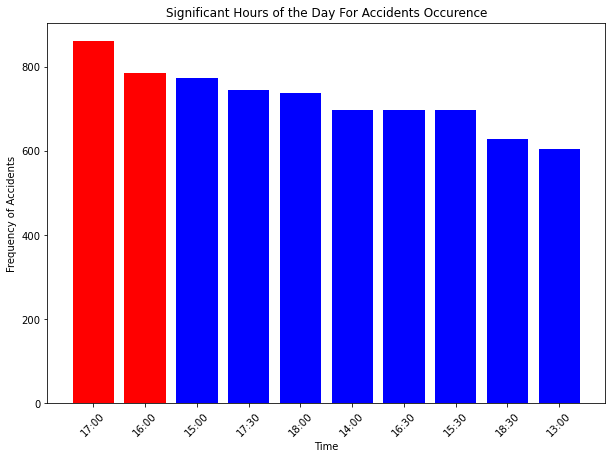

In [51]:
# Get the top 10 peak hours
top_10_hrs = accident_peak_hours[:10]

# Create a list of colors, where the first two are 'red' and the rest are 'blue'
colors = ['red' if i < 2 else 'blue' for i in range(len(top_10_hrs))]

plt.figure(figsize=(10, 7))
plt.bar(top_10_hrs.index, top_10_hrs.values, color=colors)
plt.xticks(rotation = 45);
plt.title('Significant Hours of the Day For Accidents Occurence')
plt.xlabel('Time')
plt.ylabel('Frequency of Accidents')
plt.savefig('accident_times.png')
plt.show()

### (b) Significant days of the week, on which accidents occur

In [52]:
accident['date'] = pd.to_datetime(accident['date'], dayfirst=True, format = '%d/%m/%Y')

In [53]:
accident['week day'] = accident['date'].dt.day_name()

In [54]:
accident_peak_days = accident.groupby('week day')['accident_index'].count().sort_values(ascending = False)

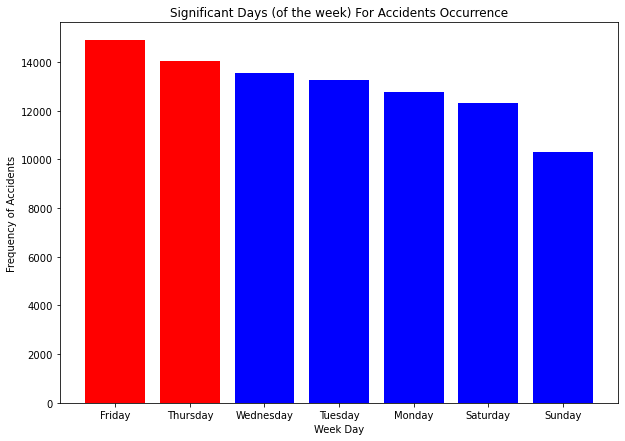

In [55]:
# Get the peak days and sort
peak_days = accident.groupby('week day')['accident_index'].count().sort_values(ascending=False)

# Create a list of colors, where the first two bars are 'red' and the rest are 'blue'
colors = ['red' if i < 2 else 'blue' for i in range(len(peak_days))]

# Create the bar plot
plt.figure(figsize=(10, 7))
plt.bar(peak_days.index, peak_days.values, color=colors)
plt.xticks(rotation = 0)
plt.title('Significant Days (of the week) For Accidents Occurrence')
plt.xlabel('Week Day')
plt.ylabel('Frequency of Accidents')
plt.savefig('accident_days.png')
plt.show()

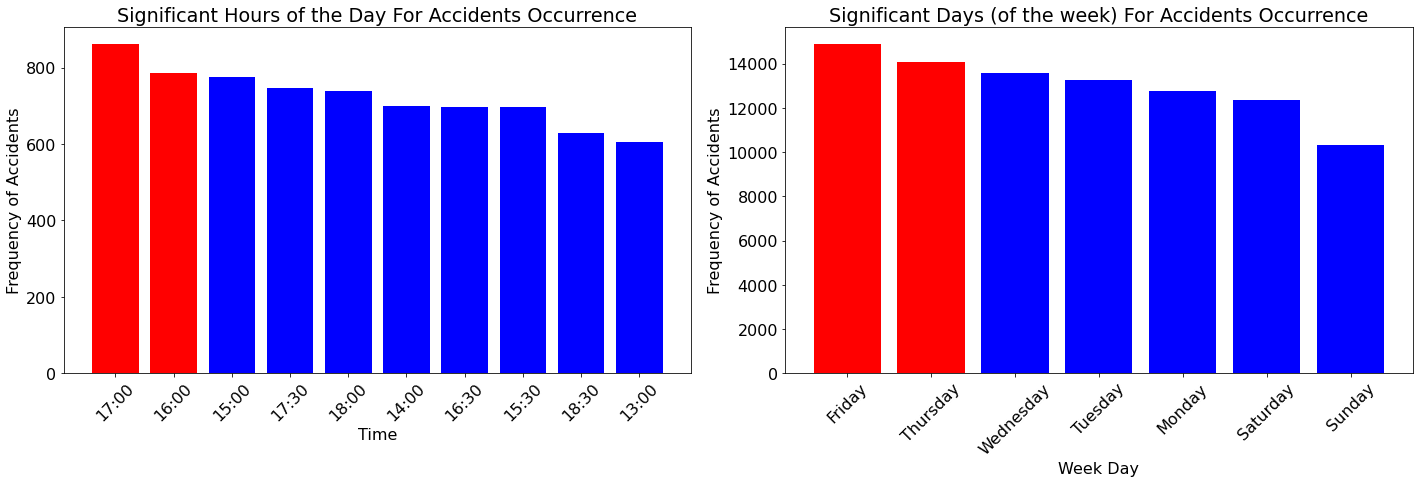

In [56]:
import matplotlib as mpl

# Increase default font size
mpl.rcParams['font.size'] = 16

fig, axs = plt.subplots(1, 2, figsize=(20, 7))  # 1 row, 2 columns
# Get the top 10 peak hours
top_10_hrs = accident_peak_hours[:10]

# Plot for hours
colors = ['red' if i < 2 else 'blue' for i in range(len(top_10_hrs))]
axs[0].bar(top_10_hrs.index, top_10_hrs.values, color=colors)
axs[0].set_xticklabels(top_10_hrs.index, rotation=45)
axs[0].set_title('Significant Hours of the Day For Accidents Occurrence')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Frequency of Accidents')

# Plot for days
colors = ['red' if i < 2 else 'blue' for i in range(len(peak_days))]
axs[1].bar(peak_days.index, peak_days.values, color=colors)
axs[1].set_xticklabels(peak_days.index, rotation=45)
axs[1].set_title('Significant Days (of the week) For Accidents Occurrence')
axs[1].set_xlabel('Week Day', fontsize=16)
axs[1].set_ylabel('Frequency of Accidents', fontsize=16)

plt.tight_layout()
plt.savefig('accident_times_and_days.png')
plt.show()

### Question 2: For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on the following vehicle types below covering 2,3,4,5 (please refer to the accident data): 
* Motorcycle 125cc and under, 
* Motorcycle over 125cc and up to 500cc and 
* Motorcycle over 500cc.

In [57]:
vehicle.vehicle_type.unique()

array([ 9,  8,  3,  2, 11,  1, 90, 19,  4,  5, 21, 97, 20, 98, 10, 17, 23,
       22, 18, 16], dtype=int64)

In [58]:
vehicle_class = [2, 3, 4, 5]

vehicle_subfolder = vehicle[vehicle['vehicle_type'].isin(vehicle_class)]

In [59]:
vehicle_subfolder['vehicle_type'].unique()

array([3, 2, 4, 5], dtype=int64)

In [60]:
data_m = pd.merge(accident, vehicle_subfolder, on = 'accident_index')

In [61]:
peak_hrs_motor = data_m.groupby('time')['accident_index'].count().sort_values(ascending = False)

- Motorcycle 125cc and under, 
- Motorcycle over 125cc and up to 500cc, 
- Motorcycle over 500cc.

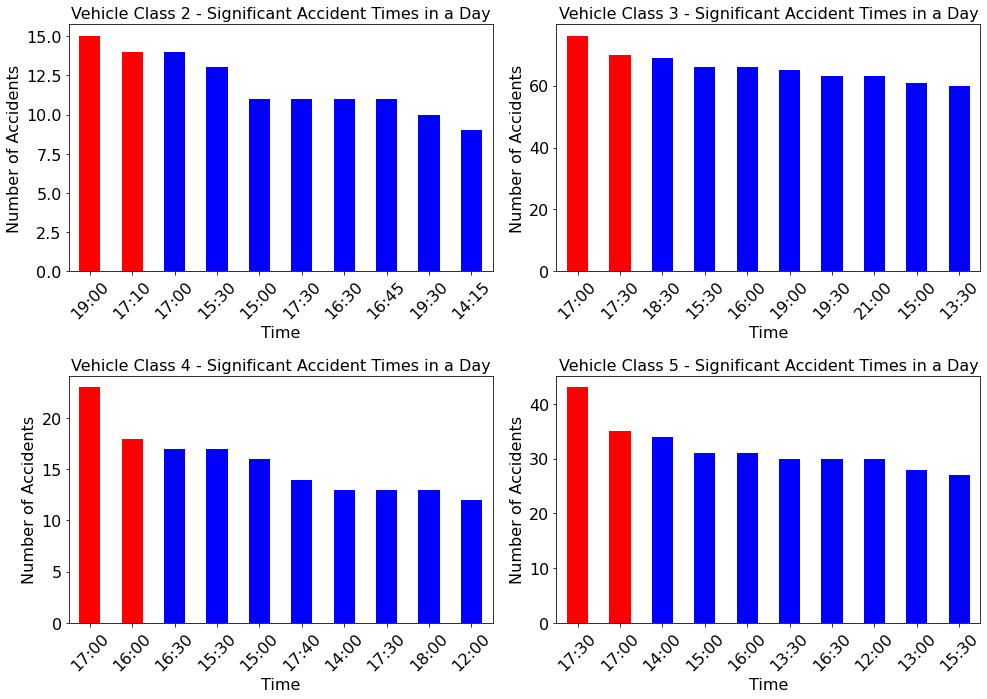

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.ravel()  # flattening axes for easy iterating
vehicle_classes = [2, 3, 4, 5]

for i, vehicle_class in enumerate(vehicle_classes):
    # Filter data for each vehicle class
    filtered_data = data_m[data_m['vehicle_type'] == vehicle_class]
    
    # Group by 'time' and count number of accidents
    grouped_data = filtered_data.groupby('time')['accident_index'].count().sort_values(ascending = False)
    
    # Create a list of colors, where the time with the highest and second highest number of accidents are 'red' and the rest are 'blue'
    colors = ['red' if idx in grouped_data.index[:2] else 'blue' for idx in grouped_data.index]
    
    # Create bar plot
    grouped_data[:10].plot(kind='bar', ax=axes[i], color=colors)
    
    # Set plot parameters
    axes[i].set_title(f'Vehicle Class {vehicle_class} - Significant Accident Times in a Day', fontsize=16)
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Number of Accidents')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45) # Rotation should be set here
    plt.tight_layout()
    
plt.savefig('accident_times_motor.png')
plt.show()

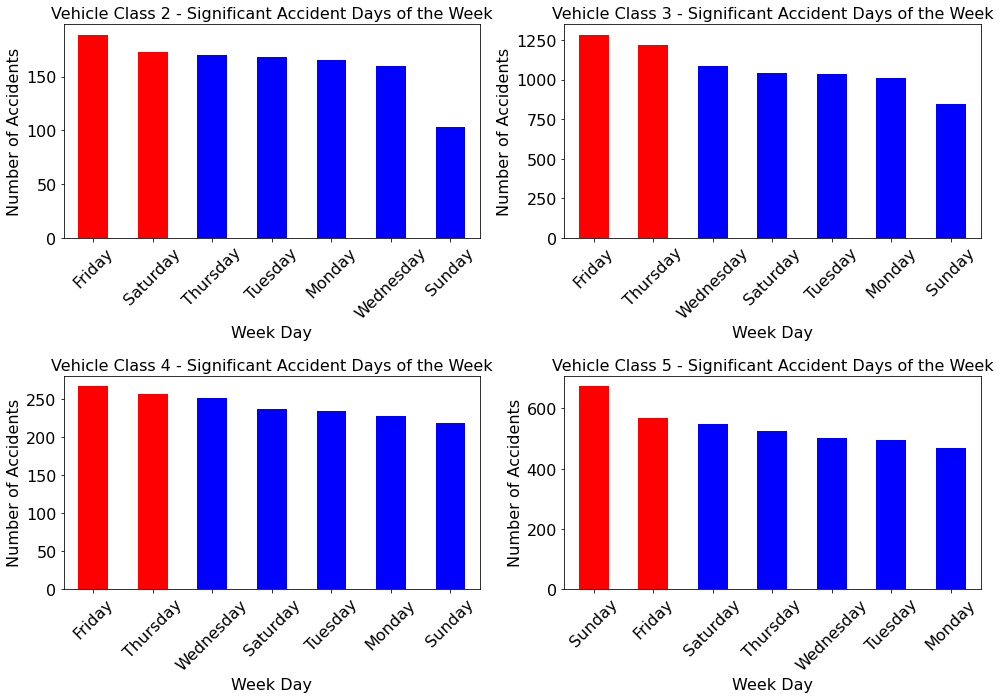

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.ravel()  # flattening axes for easy iterating
vehicle_classes = [2, 3, 4, 5]

for i, vehicle_class in enumerate(vehicle_classes):
    # Filter data for each vehicle class
    filtered_data = data_m[data_m['vehicle_type'] == vehicle_class]
    
    # Group by 'week day' and count number of accidents
    grouped_data = filtered_data.groupby('week day')['accident_index'].count().sort_values(ascending = False)
    
    # Create a list of colors, where the day with the highest and second highest number of accidents are 'red' and the rest are 'blue'
    colors = ['red' if idx in grouped_data.index[:2] else 'blue' for idx in grouped_data.index]
    
    # Create bar plot
    grouped_data.plot(kind='bar', ax=axes[i], color=colors)
    
    # Set plot parameters
    axes[i].set_title(f'Vehicle Class {vehicle_class} - Significant Accident Days of the Week', fontsize=16)
    axes[i].set_xlabel('Week Day')
    axes[i].set_ylabel('Number of Accidents')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45) # Rotation should be set here
    plt.tight_layout()
    
plt.savefig('accident_days_motor.png')
plt.show()

Data for all Motorcycle Types:


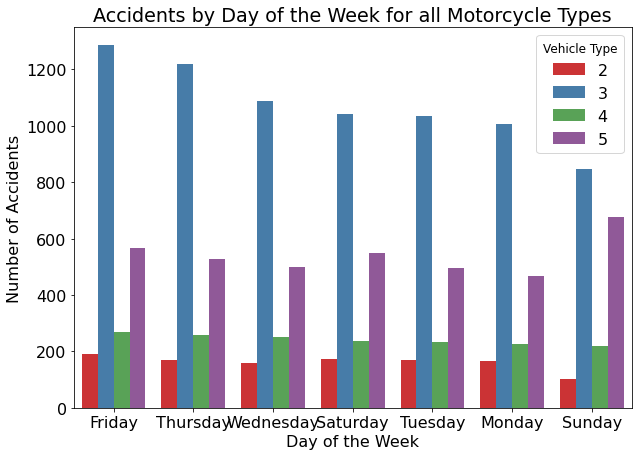

In [64]:
# Group data by 'week day' and 'vehicle_type', and count the number of records in each group
grouped_data = data_m.groupby(['week day', 'vehicle_type']).size().sort_values(ascending = False).reset_index(name='num_accidents')
print("Data for all Motorcycle Types:")

plt.figure(figsize=(10, 7))
sns.barplot(x='week day', y='num_accidents', hue='vehicle_type', data=grouped_data, palette='Set1')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Day of the Week for all Motorcycle Types')
plt.xticks(rotation=0)
plt.legend(title='Vehicle Type', title_fontsize='12')
plt.show()

### Question 3: For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

In [65]:
pedestrians = casualty[casualty['casualty_class'] == 3]

In [66]:
df_ped = pd.merge(accident, pedestrians, on = 'accident_index')
df_ped.head()

accident_index  accident_year_x accident_reference_x  location_easting_osgr  \
0  2020010219808             2020            010219808               521389.0   
1  2020010220496             2020            010220496               529337.0   
2  2020010220496             2020            010220496               529337.0   
3  2020010228005             2020            010228005               526432.0   
4  2020010228006             2020            010228006               538676.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                175144.0  -0.254001  51.462262             1   
1                176237.0  -0.139253  51.470327             1   
2                176237.0  -0.139253  51.470327             1   
3                182761.0  -0.178719  51.529614             1   
4                184371.0  -0.001683  51.541210             1   

   accident_severity  number_of_vehicles  ...  age_band_of_casualty  \
0                  3                   1  ...                     6   
1                  3                   1  ...                     1   
2                  3                   1  ...                     1   
3                  3                   1  ...                     5   
4                  2                   1  ...                     8   

  casualty_severity  pedestrian_location pedestrian_movement  car_passenger  \
0                 3                    9                   5              0   
1                 3                    1                   1              0   
2                 3                    1                   1              0   
3                 3                    5                   9              0   
4                 2                    4                   1              0   

  bus_or_coach_passenger pedestrian_road_maintenance_worker  casualty_type  \
0                      0                                  0              0   
1                      0                                  0              0   
2                      0                                  0              0   
3                      0                                  0              0   
4                      0                                  0              0   

   casualty_home_area_type  casualty_imd_decile  
0                        1                    4  
1                        1                    2  
2                        1                    2  
3                        1                    3  
4                        1                    3  

[5 rows x 55 columns]

In [67]:
peak_hrs = df_ped.groupby('time')['accident_index'].count().sort_values(ascending = False)

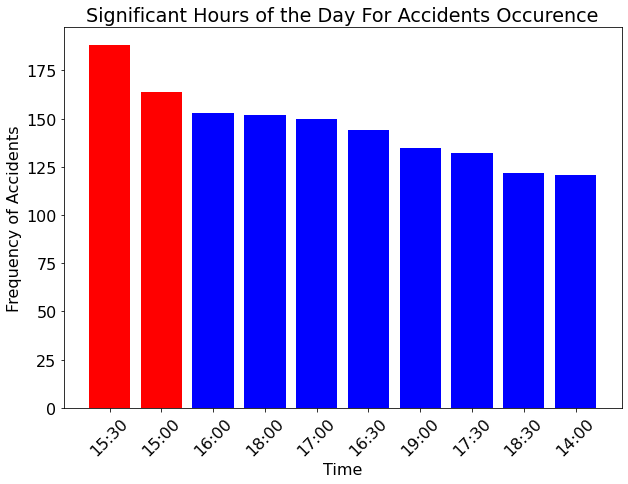

In [68]:
# Get the top 10 peak hours
top_10_hours = peak_hrs[:10]

# Create a list of colors, where the first two are 'red' and the rest are 'blue'
colors = ['red' if i < 2 else 'blue' for i in range(len(top_10_hours))]

plt.figure(figsize=(10, 7))
plt.bar(top_10_hours.index, top_10_hours.values, color=colors)
plt.xticks(rotation = 45);
plt.title('Significant Hours of the Day For Accidents Occurence')
plt.xlabel('Time')
plt.ylabel('Frequency of Accidents')
plt.savefig('accident_times_ped.png')
plt.show()

In [69]:
peak_days_ped = accident.groupby('week day')['accident_index'].count().sort_values(ascending = False)

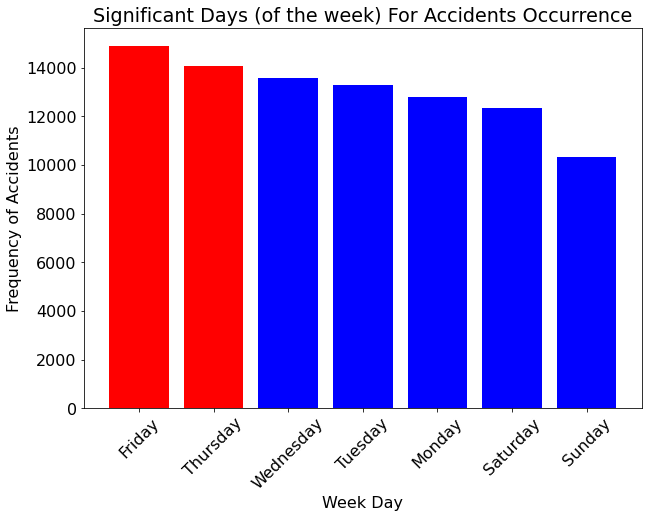

In [70]:
# Get the peak days and sort
peak_days = accident.groupby('week day')['accident_index'].count().sort_values(ascending=False)

# Create a list of colors, where the first two bars are 'red' and the rest are 'blue'
colors = ['red' if i < 2 else 'blue' for i in range(len(peak_days))]

# Create the bar plot
plt.figure(figsize=(10, 7))
plt.bar(peak_days.index, peak_days.values, color=colors)
plt.xticks(rotation = 45)
plt.title('Significant Days (of the week) For Accidents Occurrence')
plt.xlabel('Week Day')
plt.ylabel('Frequency of Accidents')
plt.savefig('accident_days_ped.png')
plt.show()

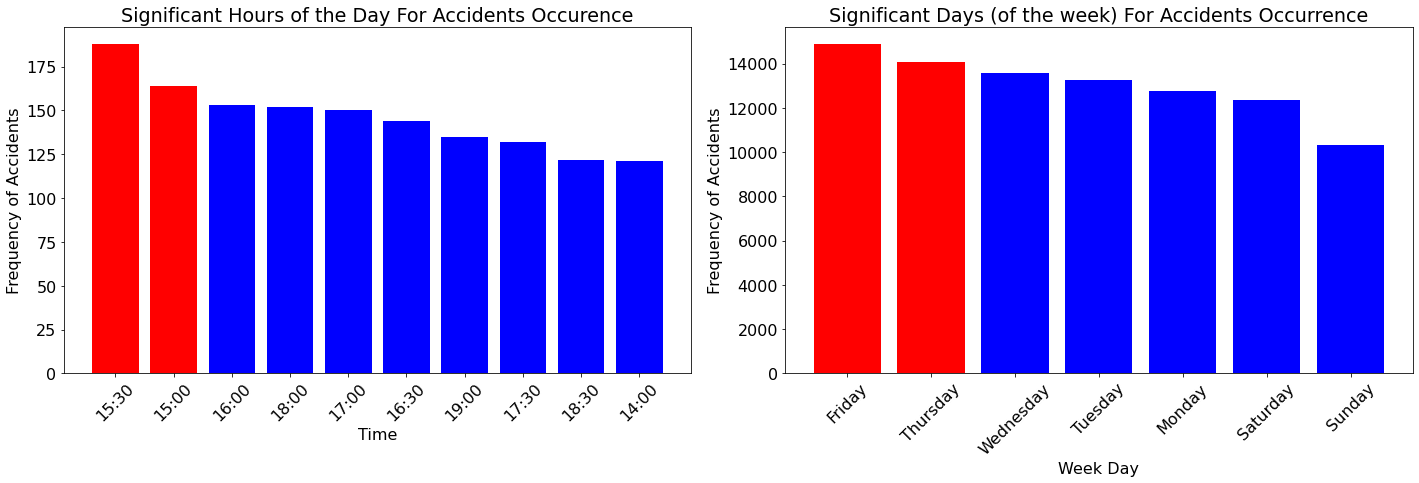

In [71]:
import matplotlib as mpl

# Increase default font size
mpl.rcParams['font.size'] = 16

fig, axs = plt.subplots(1, 2, figsize=(20, 7))  # 1 row, 2 columns

# Plot for hours
colors = ['red' if i < 2 else 'blue' for i in range(len(top_10_hours))]
axs[0].bar(top_10_hours.index, top_10_hours.values, color=colors)
axs[0].set_xticklabels(top_10_hours.index, rotation=45)
axs[0].set_title('Significant Hours of the Day For Accidents Occurence')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Frequency of Accidents')

# Plot for days
colors = ['red' if i < 2 else 'blue' for i in range(len(peak_days))]
axs[1].bar(peak_days.index, peak_days.values, color=colors)
axs[1].set_xticklabels(peak_days.index, rotation=45)
axs[1].set_title('Significant Days (of the week) For Accidents Occurrence')
axs[1].set_xlabel('Week Day', fontsize=16)
axs[1].set_ylabel('Frequency of Accidents', fontsize=16)

plt.tight_layout()
plt.savefig('accident_times_and_days_ped.png')
plt.show()


### Question 4: Using the apriori algorithm, explore the impact of selected variables on accident severity. 

We first need to select the features from the various tables to build the association.

In [72]:
features = df[['accident_severity', 'second_road_class', 'road_type', 'speed_limit', 
                     'urban_or_rural_area','vehicle_type', 'casualty_class', 'junction_control', 'police_force',
                     'light_conditions', 'weather_conditions', 'road_surface_conditions']]

In [73]:
features.vehicle_type.unique()

array([ 9,  8,  3,  2, 11,  1, 90, 19,  4,  5, 21, 97, 20, 98, 10, 17, 23,
       22, 18, 16], dtype=int64)

In [74]:
# Apply one-hot encoding to the categorical variables
df_encoded = pd.get_dummies(features, columns=features.columns, prefix=features.columns)
df_encoded.head()

accident_severity_1  accident_severity_2  accident_severity_3  \
0                    0                    0                    1   
1                    0                    0                    1   
2                    0                    0                    1   
3                    0                    0                    1   
4                    0                    1                    0   

   second_road_class_0.0  second_road_class_1.0  second_road_class_2.0  \
0                      1                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      1                      0                      0   

   second_road_class_3.0  second_road_class_4.0  second_road_class_5.0  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   second_road_class_6.0  ...  weather_conditions_6.0  weather_conditions_7.0  \
0                      0  ...                       0                       0   
1                      1  ...                       0                       0   
2                      1  ...                       0                       0   
3                      1  ...                       0                       0   
4                      0  ...                       0                       0   

   weather_conditions_8.0  weather_conditions_9.0  \
0                       0                       1   
1                       0                       0   
2                       0                       0   
3                       0                       0   
4                       0                       0   

   road_surface_conditions_1.0  road_surface_conditions_2.0  \
0                            0                            0   
1                            1                            0   
2                            1                            0   
3                            0                            1   
4                            1                            0   

   road_surface_conditions_3.0  road_surface_conditions_4.0  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   road_surface_conditions_5.0  road_surface_conditions_9.0  
0                            0                            1  
1                            0                            0  
2                            0                            0  
3                            0                            0  
4                            0                            0  

[5 rows x 116 columns]

In [75]:
from mlxtend.frequent_patterns import apriori, association_rules

In [76]:
# Frequent items (accident_severity and others)
freq_items = apriori(df_encoded, min_support=0.2, use_colnames=True)

C:\Users\MR EVANS\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [77]:
freq_items.sort_values(by='support', ascending=False)[:10]

support                                               itemsets
15   0.781013                               (weather_conditions_1.0)
1    0.777988                                  (accident_severity_3)
9    0.736380                                     (casualty_class_1)
4    0.721346                                          (road_type_6)
8    0.713871                                       (vehicle_type_9)
13   0.711648                                 (light_conditions_1.0)
16   0.688502                          (road_surface_conditions_1.0)
103  0.646959  (road_surface_conditions_1.0, weather_conditions_1.0)
6    0.644750                                (urban_or_rural_area_1)
29   0.604628          (weather_conditions_1.0, accident_severity_3)

In [78]:
# Get the association rules in a dataframe
rules = association_rules(freq_items, metric = 'confidence', min_threshold = 0.6)

In [79]:
rules.sort_values(by='lift', ascending=False)[:10]

antecedents  \
2213         (junction_control_unknown, weather_conditions_1.0, light_conditions_1.0)   
2214                             (road_surface_conditions_1.0, second_road_class_0.0)   
2212            (light_conditions_1.0, weather_conditions_1.0, second_road_class_0.0)   
2215                          (junction_control_unknown, road_surface_conditions_1.0)   
2219                               (junction_control_unknown, weather_conditions_1.0)   
2206       (light_conditions_1.0, road_surface_conditions_1.0, second_road_class_0.0)   
2217                                  (weather_conditions_1.0, second_road_class_0.0)   
2208    (junction_control_unknown, road_surface_conditions_1.0, light_conditions_1.0)   
1257                               (junction_control_unknown, weather_conditions_1.0)   
1259                             (road_surface_conditions_1.0, second_road_class_0.0)   
1260                                  (weather_conditions_1.0, second_road_class_0.0)   
1256                          (junction_control_unknown, road_surface_conditions_1.0)   
2218                                 (junction_control_unknown, light_conditions_1.0)   
2207     (road_surface_conditions_1.0, weather_conditions_1.0, second_road_class_0.0)   
2209  (junction_control_unknown, road_surface_conditions_1.0, weather_conditions_1.0)   

                                                                        consequents  \
2213                           (road_surface_conditions_1.0, second_road_class_0.0)   
2214       (junction_control_unknown, weather_conditions_1.0, light_conditions_1.0)   
2212                        (junction_control_unknown, road_surface_conditions_1.0)   
2215          (light_conditions_1.0, weather_conditions_1.0, second_road_class_0.0)   
2219     (light_conditions_1.0, road_surface_conditions_1.0, second_road_class_0.0)   
2206                             (junction_control_unknown, weather_conditions_1.0)   
2217  (junction_control_unknown, road_surface_conditions_1.0, light_conditions_1.0)   
2208                                (weather_conditions_1.0, second_road_class_0.0)   
1257                           (road_surface_conditions_1.0, second_road_class_0.0)   
1259                             (junction_control_unknown, weather_conditions_1.0)   
1260                        (junction_control_unknown, road_surface_conditions_1.0)   
1256                                (weather_conditions_1.0, second_road_class_0.0)   
2218   (road_surface_conditions_1.0, weather_conditions_1.0, second_road_class_0.0)   
2207                               (junction_control_unknown, light_conditions_1.0)   
2209                                  (light_conditions_1.0, second_road_class_0.0)   

      antecedent support  consequent support   support  confidence      lift  \
2213            0.239897            0.279245  0.203156    0.846847  3.032631   
2214            0.279245            0.239897  0.203156    0.727519  3.032631   
2212            0.238368            0.281449  0.203156    0.852278  3.028179   
2215            0.281449            0.238368  0.203156    0.721821  3.028179   
2219            0.325880            0.215306  0.203156    0.623406  2.895444   
2206            0.215306            0.325880  0.203156    0.943568  2.895444   
2217            0.323714            0.216872  0.203156    0.627579  2.893771   
2208            0.216872            0.323714  0.203156    0.936754  2.893771   
1257            0.325880            0.279245  0.261894    0.803652  2.877946   
1259            0.279245            0.325880  0.261894    0.937866  2.877946   
1260            0.323714            0.281449  0.261894    0.809031  2.874519   
1256            0.281449            0.323714  0.261894    0.930522  2.874519   
2218            0.294012            0.262748  0.203156    0.690979  2.629817   
2207            0.262748            0.294012  0.203156    0.773197  2.629817   
2209            0.264713            0.292164  0.203156  

In [80]:
rules.sort_values(by='support', ascending=False)[:10]

antecedents                    consequents  \
114  (road_surface_conditions_1.0)       (weather_conditions_1.0)   
115       (weather_conditions_1.0)  (road_surface_conditions_1.0)   
17           (accident_severity_3)       (weather_conditions_1.0)   
16        (weather_conditions_1.0)          (accident_severity_3)   
111       (weather_conditions_1.0)         (light_conditions_1.0)   
110         (light_conditions_1.0)       (weather_conditions_1.0)   
11              (casualty_class_1)          (accident_severity_3)   
10           (accident_severity_3)             (casualty_class_1)   
99        (weather_conditions_1.0)             (casualty_class_1)   
100             (casualty_class_1)       (weather_conditions_1.0)   
53        (weather_conditions_1.0)                  (road_type_6)   
54                   (road_type_6)       (weather_conditions_1.0)   
8                 (vehicle_type_9)          (accident_severity_3)   
9            (accident_severity_3)               (vehicle_type_9)   
14          (light_conditions_1.0)          (accident_severity_3)   

     antecedent support  consequent support   support  confidence      lift  \
114            0.688502            0.781013  0.646959    0.939662  1.203133   
115            0.781013            0.688502  0.646959    0.828359  1.203133   
17             0.777988            0.781013  0.604628    0.777169  0.995078   
16             0.781013            0.777988  0.604628    0.774159  0.995078   
111            0.781013            0.711648  0.585191    0.749272  1.052868   
110            0.711648            0.781013  0.585191    0.822304  1.052868   
11             0.736380            0.777988  0.579676    0.787198  1.011837   
10             0.777988            0.736380  0.579676    0.745097  1.011837   
99             0.781013            0.736380  0.578279    0.740422  1.005489   
100            0.736380            0.781013  0.578279    0.785300  1.005489   
53             0.781013            0.721346  0.570546    0.730521  1.012719   
54             0.721346            0.781013  0.570546    0.790947  1.012719   
8              0.713871            0.777988  0.568042    0.795721  1.022793   
9              0.777988            0.713871  0.568042    0.730142  1.022793   
14             0.711648            0.777988  0.559428    0.786102  1.010429   

     leverage  conviction  zhangs_metric  
114  0.109230    3.629342       0.542014  
115  0.109230    1.814823       0.770988  
17  -0.002991    0.982750      -0.021793  
16  -0.002991    0.983046      -0.022087  
111  0.029385    1.150058       0.229300  
110  0.029385    1.232368       0.174140  
11   0.006782    1.043276       0.044378  
10   0.006782    1.034196       0.052695  
99   0.003157    1.015571       0.024929  
100  0.003157    1.019967       0.020708  
53   0.007166    1.034048       0.057354  
54   0.007166    1.047519       0.045073  
8    0.012659    1.086807       0.077885  
9    0.012659    1.060296       0.100378  
14   0.005774    1.037931       0.035793

In [81]:
rules.sort_values(by='confidence', ascending=False)[:10]

antecedents  \
1159               (vehicle_type_9, road_type_6, second_road_class_0.0)   
1166             (road_type_6, second_road_class_0.0, casualty_class_1)   
310                           (second_road_class_0.0, casualty_class_1)   
1230  (weather_conditions_1.0, second_road_class_0.0, casualty_class_1)   
295                      (urban_or_rural_area_1, second_road_class_0.0)   
302                             (vehicle_type_9, second_road_class_0.0)   
285                                (road_type_6, second_road_class_0.0)   
26                                              (second_road_class_0.0)   
1198          (vehicle_type_9, second_road_class_0.0, casualty_class_1)   
297                      (urban_or_rural_area_2, second_road_class_0.0)   

                     consequents  antecedent support  consequent support  \
1159  (junction_control_unknown)            0.220441            0.419995   
1166  (junction_control_unknown)            0.213435            0.419995   
310   (junction_control_unknown)            0.296671            0.419995   
1230  (junction_control_unknown)            0.231465            0.419995   
295   (junction_control_unknown)            0.203906            0.419995   
302   (junction_control_unknown)            0.305097            0.419995   
285   (junction_control_unknown)            0.301411            0.419995   
26    (junction_control_unknown)            0.417172            0.419995   
1198  (junction_control_unknown)            0.207953            0.419995   
297   (junction_control_unknown)            0.213266            0.419995   

       support  confidence      lift  leverage  conviction  zhangs_metric  
1159  0.219836    0.997256  2.374445  0.127252  211.360003       0.742534  
1166  0.212830    0.997166  2.374231  0.123188  204.642740       0.735872  
310   0.295808    0.997092  2.374054  0.171207  199.423895       0.822914  
1230  0.230785    0.997062  2.373985  0.133571  197.441596       0.753079  
295   0.203306    0.997056  2.373970  0.117666  197.033937       0.727006  
302   0.304192    0.997034  2.373916  0.176053  195.524690       0.832858  
285   0.300516    0.997028  2.373904  0.173924  195.185243       0.828460  
26    0.415930    0.997021  2.373887  0.240719  194.710857       0.993003  
1198  0.207329    0.997001  2.373838  0.119990  193.390135       0.730691  
297   0.212624    0.996988  2.373807  0.123053  192.540389       0.735618

#### Filtering the rules 

In [82]:
rules_filtered = rules[(rules['lift'] >= 0.5) & (rules['support'] >= 0.5) & (rules['confidence'] >= 0.5)]
rules_filtered.head()

antecedents              consequents  antecedent support  \
2            (road_type_6)    (accident_severity_3)            0.721346   
3    (accident_severity_3)            (road_type_6)            0.777988   
5  (urban_or_rural_area_1)    (accident_severity_3)            0.644750   
6    (accident_severity_3)  (urban_or_rural_area_1)            0.777988   
8         (vehicle_type_9)    (accident_severity_3)            0.713871   

   consequent support   support  confidence      lift  leverage  conviction  \
2            0.777988  0.550443    0.763078  0.980835 -0.010755    0.937067   
3            0.721346  0.550443    0.707521  0.980835 -0.010755    0.952733   
5            0.777988  0.527700    0.818456  1.052016  0.026092    1.222910   
6            0.644750  0.527700    0.678288  1.052016  0.026092    1.104247   
8            0.777988  0.568042    0.795721  1.022793  0.012659    1.086807   

   zhangs_metric  
2      -0.065527  
3      -0.080892  
5       0.139182  
6       0.222710  
8       0.077885

In [83]:
len(rules_filtered)

54

In [84]:
# List of columns to drop
columns_to_drop = ['antecedent support', 'consequent support', 'zhangs_metric', 'leverage', 'conviction']

# Drop the columns
print_rules = rules_filtered.drop(columns=columns_to_drop)

In [85]:
print_rules.sort_values(by='support', ascending=False)[:20]

antecedents                    consequents   support  \
114  (road_surface_conditions_1.0)       (weather_conditions_1.0)  0.646959   
115       (weather_conditions_1.0)  (road_surface_conditions_1.0)  0.646959   
17           (accident_severity_3)       (weather_conditions_1.0)  0.604628   
16        (weather_conditions_1.0)          (accident_severity_3)  0.604628   
111       (weather_conditions_1.0)         (light_conditions_1.0)  0.585191   
110         (light_conditions_1.0)       (weather_conditions_1.0)  0.585191   
10           (accident_severity_3)             (casualty_class_1)  0.579676   
11              (casualty_class_1)          (accident_severity_3)  0.579676   
100             (casualty_class_1)       (weather_conditions_1.0)  0.578279   
99        (weather_conditions_1.0)             (casualty_class_1)  0.578279   
54                   (road_type_6)       (weather_conditions_1.0)  0.570546   
53        (weather_conditions_1.0)                  (road_type_6)  0.570546   
8                 (vehicle_type_9)          (accident_severity_3)  0.568042   
9            (accident_severity_3)               (vehicle_type_9)  0.568042   
15           (accident_severity_3)         (light_conditions_1.0)  0.559428   
14          (light_conditions_1.0)          (accident_severity_3)  0.559428   
91        (weather_conditions_1.0)               (vehicle_type_9)  0.551573   
90                (vehicle_type_9)       (weather_conditions_1.0)  0.551573   
2                    (road_type_6)          (accident_severity_3)  0.550443   
3            (accident_severity_3)                  (road_type_6)  0.550443   

     confidence      lift  
114    0.939662  1.203133  
115    0.828359  1.203133  
17     0.777169  0.995078  
16     0.774159  0.995078  
111    0.749272  1.052868  
110    0.822304  1.052868  
10     0.745097  1.011837  
11     0.787198  1.011837  
100    0.785300  1.005489  
99     0.740422  1.005489  
54     0.790947  1.012719  
53     0.730521  1.012719  
8      0.795721  1.022793  
9      0.730142  1.022793  
15     0.719070  1.010429  
14     0.786102  1.010429  
91     0.706228  0.989294  
90     0.772651  0.989294  
2      0.763078  0.980835  
3      0.707521  0.980835

In [86]:
print_rules.sort_values(by='lift', ascending=False)[:15]

antecedents  \
693         (light_conditions_1.0, weather_conditions_1.0)   
696                          (road_surface_conditions_1.0)   
692    (light_conditions_1.0, road_surface_conditions_1.0)   
697                               (weather_conditions_1.0)   
276                          (road_surface_conditions_1.0)   
275          (weather_conditions_1.0, accident_severity_3)   
115                               (weather_conditions_1.0)   
114                          (road_surface_conditions_1.0)   
277                               (weather_conditions_1.0)   
274     (road_surface_conditions_1.0, accident_severity_3)   
695                                 (light_conditions_1.0)   
694  (road_surface_conditions_1.0, weather_conditions_1.0)   
113                          (road_surface_conditions_1.0)   
112                                 (light_conditions_1.0)   
111                               (weather_conditions_1.0)   

                                               consequents   support  \
693                          (road_surface_conditions_1.0)  0.508314   
696         (light_conditions_1.0, weather_conditions_1.0)  0.508314   
692                               (weather_conditions_1.0)  0.508314   
697    (light_conditions_1.0, road_surface_conditions_1.0)  0.508314   
276          (weather_conditions_1.0, accident_severity_3)  0.502893   
275                          (road_surface_conditions_1.0)  0.502893   
115                          (road_surface_conditions_1.0)  0.646959   
114                               (weather_conditions_1.0)  0.646959   
277     (road_surface_conditions_1.0, accident_severity_3)  0.502893   
274                               (weather_conditions_1.0)  0.502893   
695  (road_surface_conditions_1.0, weather_conditions_1.0)  0.508314   
694                                 (light_conditions_1.0)  0.508314   
113                                 (light_conditions_1.0)  0.537655   
112                          (road_surface_conditions_1.0)  0.537655   
111                                 (light_conditions_1.0)  0.585191   

     confidence      lift  
693    0.868629  1.261623  
696    0.738290  1.261623  
692    0.945428  1.210515  
697    0.650840  1.210515  
276    0.730417  1.208043  
275    0.831740  1.208043  
115    0.828359  1.203133  
114    0.939662  1.203133  
277    0.643899  1.199625  
274    0.936922  1.199625  
695    0.714277  1.104053  
694    0.785698  1.104053  
113    0.780906  1.097320  
112    0.755507  1.097320  
111    0.749272  1.052868

In [87]:
# pip install plotly
# pip install kaleido

### Interactive Scatterplot
This is an interactive scatter plot of the 54 rules obtained from the association rule mining (Apriori) algorithm to visualize the relationship these rules have in terms of support, confidence and lift. Move the mouse cursor on the bubble to display the antecedents, consequents, support and confidence of each rule.

In [88]:
import plotly.express as px
import plotly.io as pio

rules_filtered['antecedents'] = rules_filtered['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_filtered['consequents'] = rules_filtered['consequents'].apply(lambda x: ', '.join(list(x)))

fig = px.scatter(rules_filtered, x='support', y='confidence', color='lift', size='lift',
                 hover_data=['antecedents','consequents'])

fig.update_layout(
    title="Support vs Confidence",
    title_x=0.5,
    xaxis_title="Support",
    yaxis_title="Confidence",
    font=dict(
        #family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)

fig.update_traces(marker=dict(colorscale='Viridis'))  # change 'Viridis' to any color scale you like
# pio.write_image(fig, 'support_vs_confidenc_1.png')
fig.show()

### Cluster analysis on Humberside regions

In [330]:
# Extraction of accident and lsoa data from the Humberside regions

In [89]:
query = """
    SELECT 
        a.*, l.*
    FROM 
        accident a 
    JOIN 
        lsoa l ON a.lsoa_of_accident_location = l.lsoa01cd
    WHERE 
        (l.lsoa01nm LIKE '%Kingston Upon Hull%'
        OR l.lsoa01nm LIKE '%North Lincolnshire%'
        OR l.lsoa01nm LIKE '%North East Lincolnshire%'
        OR l.lsoa01nm LIKE '%East Riding of Yorkshire%')
    AND a.accident_year = 2020
"""
acc_lsoa = pd.read_sql(query, con)

In [90]:
acc_lsoa.head(3)

accident_index  accident_year accident_reference  location_easting_osgr  \
0  2020160914930           2020          160914930               506050.0   
1  2020160915008           2020          160915008               497660.0   
2  2020160915028           2020          160915028               510449.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                428813.0  -0.393424  53.744936            16   
1                402806.0  -0.528743  53.512895            16   
2                434112.0  -0.324858  53.791630            16   

   accident_severity  number_of_vehicles  ...  \
0                  3                   2  ...   
1                  3                   1  ...   
2                  2                   1  ...   

   did_police_officer_attend_scene_of_accident trunk_road_flag  \
0                                            1               2   
1                                            1               2   
2                                            1               2   

   lsoa_of_accident_location objectid   lsoa01cd                 lsoa01nm  \
0                  E01012777    12777  E01012777  Kingston upon Hull 028E   
1                  E01013325    13325  E01013325  North Lincolnshire 022C   
2                  E01012788    12788  E01012788  Kingston upon Hull 002E   

                 lsoa01nmw   shape__area  shape__length  \
0  Kingston upon Hull 028E  3.567509e+05    3963.099631   
1  North Lincolnshire 022C  2.922303e+07   35402.961317   
2  Kingston upon Hull 002E  4.380009e+05    4731.122554   

                               globalid  
0  4c068a55-c2d9-426c-9cfa-94742ef4a3ff  
1  7ef78052-d8cd-44b7-83fe-911922ac653e  
2  3976daa3-b707-42ec-80fd-cc3ee771e32f  

[3 rows x 43 columns]

In [91]:
df_loc = acc_lsoa[['accident_index','longitude', 'latitude']]

In [92]:
df_loc.head()

accident_index  longitude   latitude
0  2020160914930  -0.393424  53.744936
1  2020160915008  -0.528743  53.512895
2  2020160915028  -0.324858  53.791630
3  2020160915041  -0.095008  53.574501
4  2020160915047  -0.327733  53.767805

In [93]:
df_loc.isnull().sum()

accident_index    0
longitude         0
latitude          0
dtype: int64

In [94]:
data_loc = df_loc.drop('accident_index', axis=1)

#### KMeans

In [95]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

In [96]:
X =  pd.DataFrame(data_loc).to_numpy()

In [97]:
X

array([[-0.393424, 53.744936],
       [-0.528743, 53.512895],
       [-0.324858, 53.79163 ],
       ...,
       [-0.30888 , 53.78275 ],
       [-0.703181, 53.569801],
       [-0.342063, 53.742609]])

In [98]:
sum_squared_errors = []

for num_cluster in range(1, 10):
    kmeans = KMeans(n_clusters = num_cluster, n_init=10)
    kmeans.fit(X)
    sum_squared_errors.append(kmeans.inertia_)

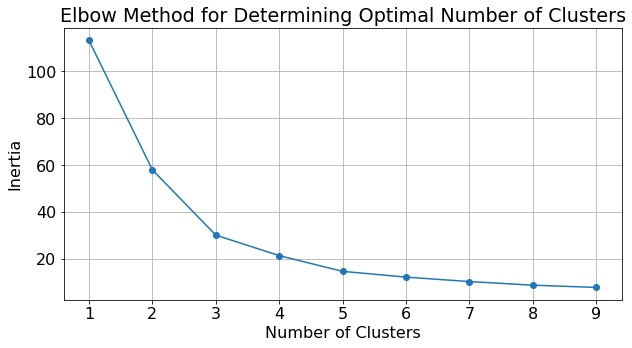

In [99]:
# Create a DataFrame with the number of clusters and their corresponding SSE
cluster_data = pd.DataFrame({'Num_Clusters': range(1, 10), 'SSE': sum_squared_errors})

# Create a plot to visualize the elbow method
plt.figure(figsize=(10, 5))
plt.plot(cluster_data['Num_Clusters'], cluster_data['SSE'], marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title(f'Elbow Method for Determining Optimal Number of Clusters')
plt.grid()
plt.show()

In [100]:
scaler = StandardScaler()

In [101]:
X_scaler = scaler.fit_transform(data_loc)

In [102]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [103]:
labels = kmeans.fit_predict(X)

In [104]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.27182322, 54.04195014],
       [-0.09098956, 53.57604958],
       [-0.36413217, 53.75605526],
       [-0.71434247, 53.66534987]])

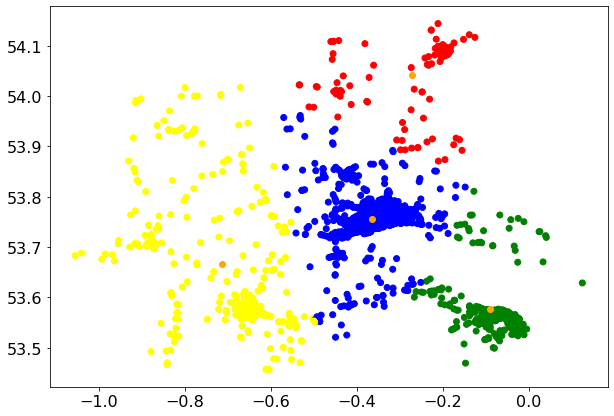

In [105]:
fig = plt.figure(figsize= (10, 7))
colmap = {1: 'red', 2: 'green', 3: 'blue', 4: 'yellow'}
colors = list(map(lambda x: colmap[x+1], labels))

plt.scatter(data_loc['longitude'], data_loc['latitude'], color = colors)

plt.scatter(centroids[:,0], centroids[:,1], color = 'orange')
plt.savefig('cluster.png')
plt.show()

In [106]:
df_loc

accident_index  longitude   latitude
0     2020160914930  -0.393424  53.744936
1     2020160915008  -0.528743  53.512895
2     2020160915028  -0.324858  53.791630
3     2020160915041  -0.095008  53.574501
4     2020160915047  -0.327733  53.767805
...             ...        ...        ...
1658  2020161014491  -0.651104  53.566753
1659  2020161014528  -0.424674  53.839482
1660  2020161014544  -0.308880  53.782750
1661  2020161014546  -0.703181  53.569801
1662  2020161014949  -0.342063  53.742609

[1663 rows x 3 columns]

#### This is an interactive map that shows the region name when you click on the icon (centroids)

In [109]:
import folium

# Create a color map for the labels
colmap = {1: 'red', 2: 'green', 3: 'blue', 4: 'yellow'}

# Create a cluster map for the labels
clustermap = {1: 'East Riding of Yorkshire', 2: 'North East Lincolnshire', 3: 'Kingston upon Hull', 4: 'North Lincolnshire'}

# Initialize a map centered at the mean latitude and longitude
m = folium.Map(location=[df_loc['latitude'].mean(), df_loc['longitude'].mean()], zoom_start=10)

# Add a marker for each point
for _, row in df_loc.iterrows():
    label = labels[_]  # Assume that labels is a list or a pandas Series with the same length as df
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,  # You can change the size of the markers here
        fill=True,
        color=colmap[label+1],  # Color of the markers is determined by the label
        fill_opacity=0.6
    ).add_to(m)

# Add a marker for each centroid
for i, centroid in enumerate(centroids):
    # Popup content
    popup = folium.Popup(clustermap[i+1], parse_html=True)
    # Create a custom icon
    icon = folium.features.CustomIcon('http://maps.google.com/mapfiles/ms/icons/' + colmap[i+1] + '-dot.png', icon_size=(35, 35))
    folium.Marker(
        location=[centroid[1], centroid[0]],  # Swap the order if your centroids are in (longitude, latitude) order
        icon=icon,  # Use the custom icon
        popup=popup  # Add the popup to the marker
    ).add_to(m)

# Display the map
m

### Finding insights from the clustered regions

In [110]:
df_loc['labels'] = labels

In [229]:
def plot_histograms(feature_name, x_label, y_label, title):
    # Define your custom labels
    custom_labels = ['East Riding', 'North East Lincolnshire', 'Kingston upon Hull', 'North Lincolnshire']

    # Create a grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(12,9))

    # Flatten the axes for easy iteration
    axs = axs.flatten()

    # Loop over the labels you're interested in
    for i, label in enumerate(range(4)):
        # Compute the data for this label
        data1 = pd.merge(df_loc[df_loc['labels'] == label], df, on='accident_index')[feature_name]
        
        # Compute the histogram of the data
        counts, bins = np.histogram(data1, bins=10)  # You can adjust the number of bins as needed
        
        # Determine the bin with the maximum count
        max_bin_index = np.argmax(counts)
        
        # Set color of each bin. The color of the bin with the maximum count is 'orange', others are 'blue'
        colors = ['orange' if j == max_bin_index else 'blue' for j in range(len(bins)-1)]
        
        # Draw the histogram as a bar chart
        axs[i].bar(bins[:-1], counts, width=np.diff(bins), color=colors, align='edge')
        
        # Set the title of the subplot to the corresponding custom label
        axs[i].set_title(custom_labels[i])
        
        # Add labels to the x-axis and y-axis
        axs[i].set_xlabel(x_label)
        axs[i].set_ylabel(y_label)

    # Adjust layout for readability
    plt.tight_layout()

    # Add a title for the whole figure (optional)
    fig.suptitle(title, fontsize=16, y=1.02)

    # Display the plot
    plt.show()

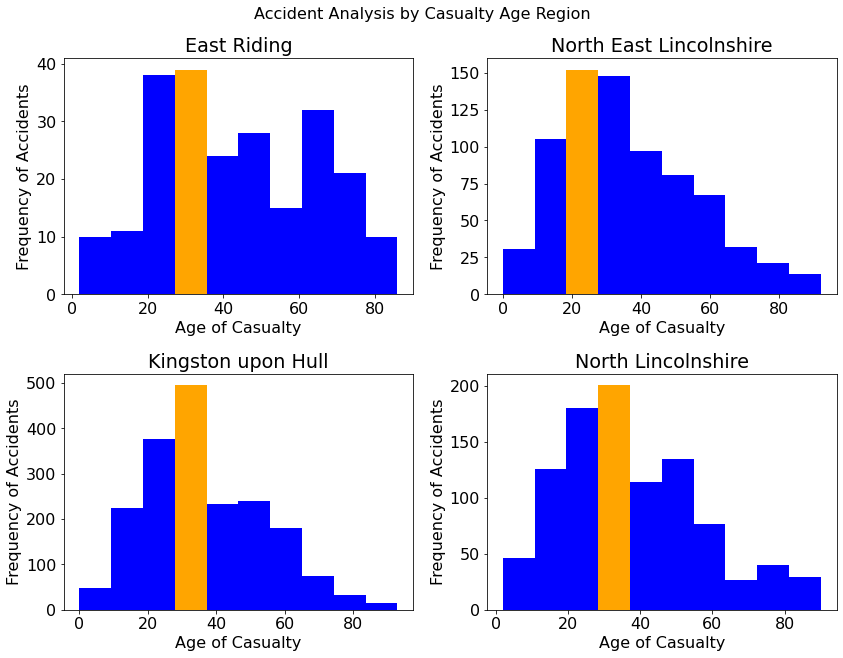

In [232]:
plot_histograms('age_of_casualty', 'Age of Casualty', 'Frequency of Accidents', 'Accident Analysis by Casualty Age Region')

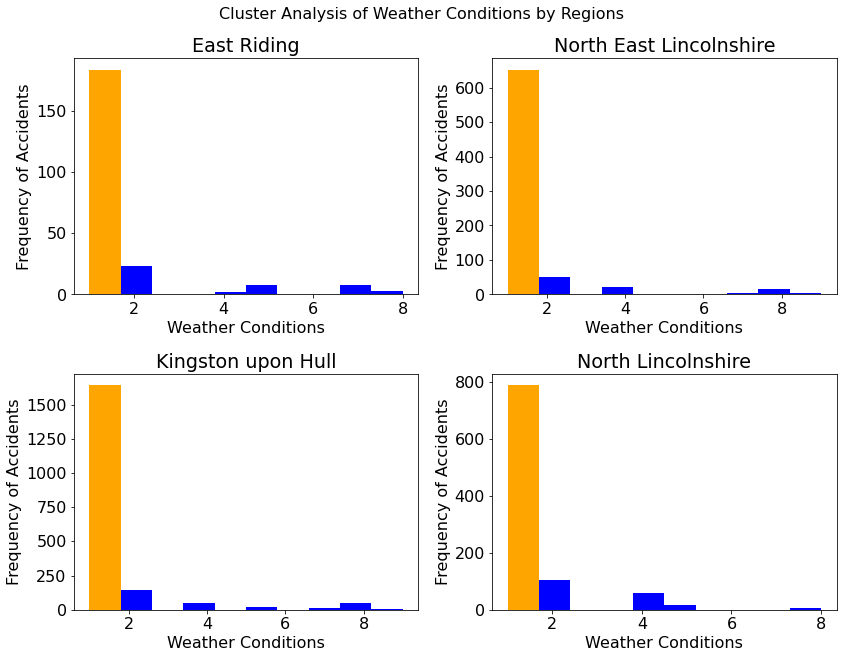

In [192]:
plot_histograms('weather_conditions', 'Weather Conditions', 'Frequency of Accidents', 'Cluster Analysis of Weather Conditions by Regions')

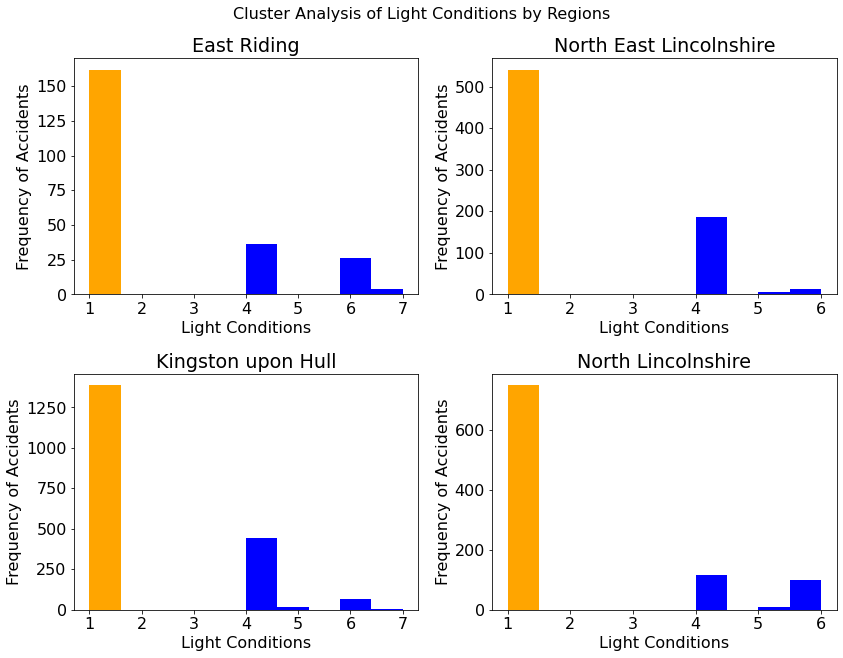

In [193]:
plot_histograms('light_conditions', 'Light Conditions', 'Frequency of Accidents', 'Cluster Analysis of Light Conditions by Regions')

### Road Types
Codes
- Roundabout - 1
- One way street - 2
- Dual carriageway - 3
- Single carriageway - 6
- Slip road- 7
- Unknown - 9

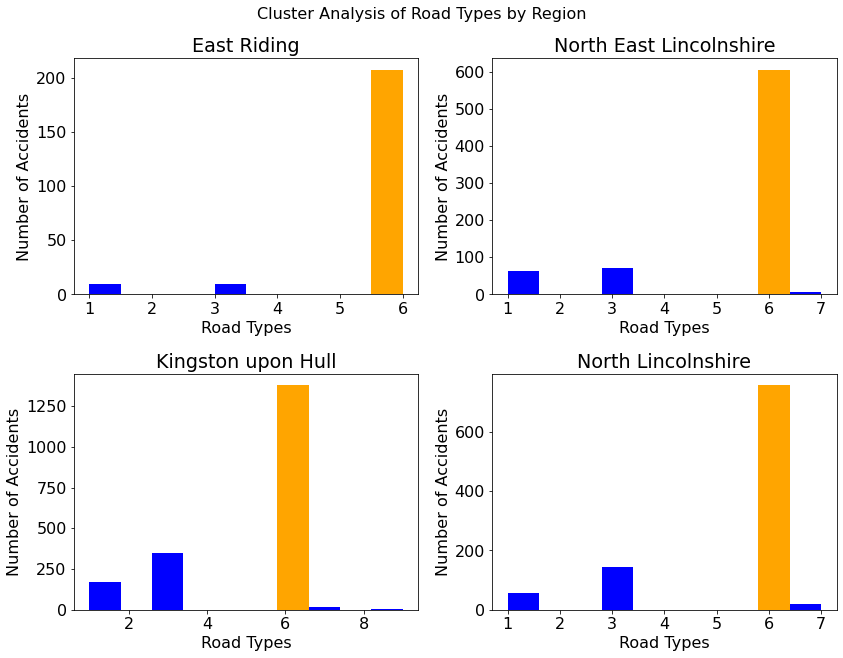

In [196]:
plot_histograms('road_type', 'Road Types', 'Frequency of Accidents', 'Cluster Analysis of Road Types by Region')

In [255]:
df.weather_conditions.value_counts()

1.0    166551
2.0     27042
8.0      5883
9.0      4749
5.0      3856
4.0      3312
7.0      1233
3.0       466
6.0       158
Name: weather_conditions, dtype: int64

In [257]:
df.road_type.value_counts()

6    153827
3     35928
1     12208
9      3820
2      3755
7      3712
Name: road_type, dtype: int64

### Weather Condition Codes

1. Fine without high winds
2. Raining without high winds
3. Snowing without high winds
4. Fine with high winds
5. Raining with high winds
6. Snowing with high winds
7. Fog or mist - if hazard
8. Other

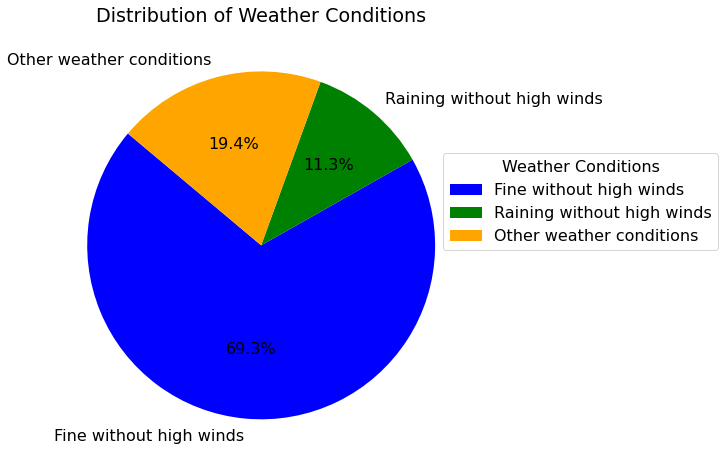

In [254]:
# Get the counts for each unique value in the 'weather_conditions' column
weather_conditions_counts = df['weather_conditions'].value_counts()

# Combine all other conditions as one
final_counts = weather_conditions_counts[:2].append(pd.Series(weather_conditions_counts[2:].sum(), index=['Others']))
final_counts.index = [1.0, 2.0, 'Others']

# Define the labels for the legend
labels_mapping = {
    1.0: 'Fine without high winds',
    2.0: 'Raining without high winds',
    'Others': 'Other weather conditions'
}
legend_labels = [labels_mapping[index] for index in final_counts.index]

# Define distinct colors (you can choose your own colors)
colors = ['blue', 'green', 'orange']

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(final_counts, labels=legend_labels, autopct='%1.1f%%', startangle=140, colors=colors)

# Add a legend to the right and align with the middle of the plot
plt.legend(legend_labels, title="Weather Conditions", loc="center left", bbox_to_anchor=(0.9, 0.6))

# Add a title
plt.title('Distribution of Weather Conditions')

# Display the plot
plt.show()

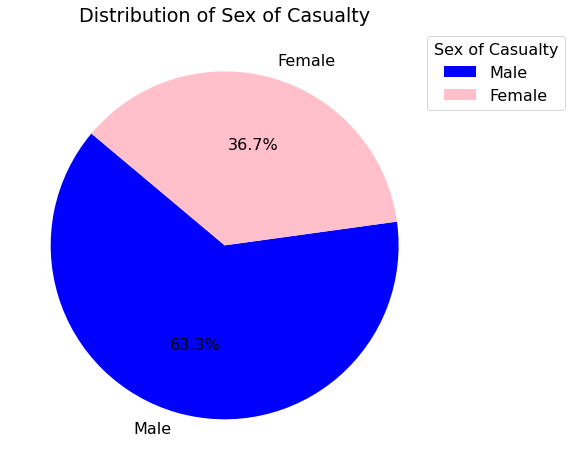

In [231]:
# Get the counts for each unique value in the 'sex_of_casualty' column
sex_of_casualty_counts = df['sex_of_casualty'].value_counts()

# Define the labels for the legend
labels_mapping = {1.0: 'Male', 2.0: 'Female'}
legend_labels = [labels_mapping[index] for index in sex_of_casualty_counts.index]

# Define distinct colors
colors = ['blue', 'pink']

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(sex_of_casualty_counts, labels=legend_labels, autopct='%1.1f%%', startangle=140, colors=colors)

# Add a legend at the top right, further away from the main chart
plt.legend(legend_labels, title="Sex of Casualty", loc="upper right", bbox_to_anchor=(1.3, 1))

# Add a title
plt.title('Distribution of Sex of Casualty')

# Display the plot
plt.show()


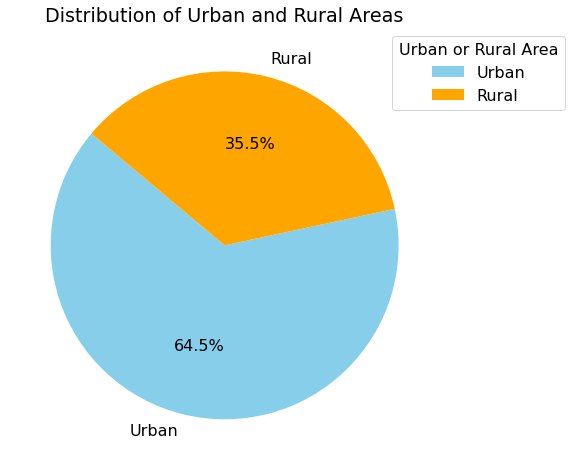

In [230]:
import matplotlib.pyplot as plt

# Get the counts for each unique value in the 'urban_or_rural_area' column
urban_rural_counts = df['urban_or_rural_area'].value_counts()

# Define a mapping for the values
labels_mapping = {1: 'Urban', 2: 'Rural'}  # Adjust this mapping according to your data
labels = [labels_mapping[idx] for idx in urban_rural_counts.index]

# Define distinct colors
colors = ['skyblue', 'orange']

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(urban_rural_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)

# Add a legend at the top right, further away from the main chart
plt.legend(labels, title="Urban or Rural Area", loc="upper right", bbox_to_anchor=(1.3, 1))

# Add a title
plt.title('Distribution of Urban and Rural Areas')

# Display the plot
plt.show()

In [206]:
import matplotlib.pyplot as plt

def plot_pie_chart(feature, title):
    # Get the counts for each unique value in the specified feature
    feature_counts = df[feature].value_counts()

    # Create a pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20c.colors)

    # Add a legend at the top right, further away from the main chart
    plt.legend(feature_counts.index, title=feature, loc="upper right", bbox_to_anchor=(1.3, 1))

    # Add a title
    plt.title(title)

    # Display the plot
    plt.show()

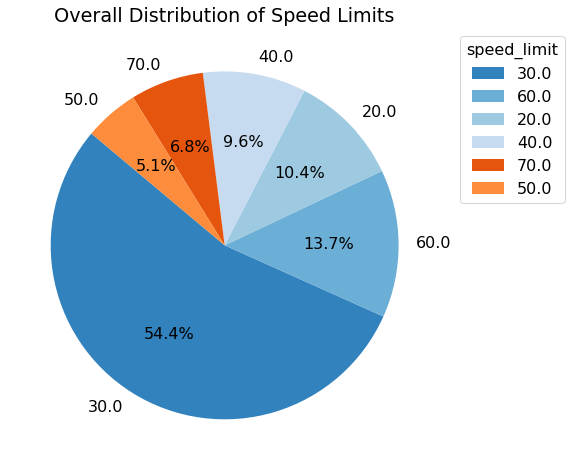

In [234]:
plot_pie_chart('speed_limit', 'Overall Distribution of Speed Limits')

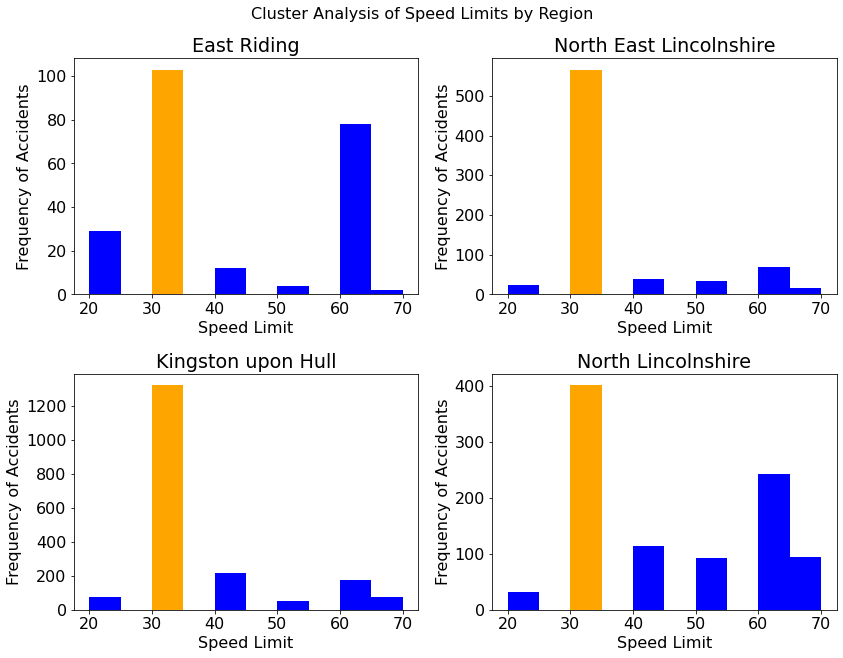

In [233]:
plot_histograms('speed_limit', 'Speed Limit', 'Frequency of Accidents', 'Cluster Analysis of Speed Limits by Region')

In [235]:
df.speed_limit.value_counts()

30.0    116014
60.0     29302
20.0     22133
40.0     20460
70.0     14531
50.0     10810
Name: speed_limit, dtype: int64

### Question 6: Outlier Detection

In [200]:
df

accident_index  accident_severity  second_road_class  road_type  \
0       2020010219808                  3                0.0          6   
1       2020010220496                  3                6.0          6   
2       2020010220496                  3                6.0          6   
3       2020010228005                  3                6.0          6   
4       2020010228006                  2                0.0          6   
...               ...                ...                ...        ...   
220430  2020991030297                  2                6.0          6   
220431  2020991030297                  2                6.0          6   
220432  2020991030900                  3                6.0          6   
220433  2020991030900                  3                6.0          6   
220434  2020991032575                  3                0.0          6   

        speed_limit  urban_or_rural_area  light_conditions  \
0              20.0                    1               1.0   
1              20.0                    1               1.0   
2              20.0                    1               1.0   
3              30.0                    1               4.0   
4              30.0                    1               4.0   
...             ...                  ...               ...   
220430         60.0                    2               1.0   
220431         60.0                    2               1.0   
220432         30.0                    1               1.0   
220433         30.0                    1               1.0   
220434         30.0                    1               1.0   

        weather_conditions  road_surface_conditions junction_control  ...  \
0                      9.0                      9.0          unknown  ...   
1                      1.0                      1.0              2.0  ...   
2                      1.0                      1.0              2.0  ...   
3                      1.0                      2.0              1.0  ...   
4                      1.0                      1.0          unknown  ...   
...                    ...                      ...              ...  ...   
220430                 1.0                      1.0          unknown  ...   
220431                 1.0                      1.0          unknown  ...   
220432                 1.0                      1.0              4.0  ...   
220433                 1.0                      1.0              4.0  ...   
220434                 1.0                      1.0          unknown  ...   

        casualty_class  age_of_vehicle  \
0                    3             6.0   
1                    3             2.0   
2                    3             2.0   
3                    3             7.0   
4                    3             8.0   
...                ...             ...   
220430               1             2.0   
220431               1             2.0   
220432               1             1.0   
220433               1             7.0   
220434               3             2.0   

        did_police_officer_attend_scene_of_accident  \
0                                               3.0   
1                                               1.0   
2                                               1.0   
3                                               1.0   
4                                               1.0   
...                                             ...   
220430                                          1.0   
220431                                          1.0   
220432                                          2.0   
220433                                          2.0   
220434                                          1.0   

        pedestrian_crossing_physical_facilities  longitude   latitude  \
0                                           9.0  -0.254001  51.462262   
1                                           4.0  -0.139253  51.470327   
2                                           4.0  -0.139253  51.

In [201]:
df.columns

Index(['accident_index', 'accident_severity', 'second_road_class', 'road_type',
       'speed_limit', 'urban_or_rural_area', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'junction_control',
       'police_force', 'vehicle_type', 'casualty_class', 'age_of_vehicle',
       'did_police_officer_attend_scene_of_accident',
       'pedestrian_crossing_physical_facilities', 'longitude', 'latitude',
       'sex_of_casualty', 'age_of_casualty', 'pedestrian_movement',
       'junction_location'],
      dtype='object')

#### Visualizing with Boxplot

#### Checking for null values in the selected columns

The cleaned data df will be subject to outlier detection function to root out the columns with outliers and then treated using the Inter Quartile Range (IGR) method.

In [258]:
numerical_data = df.select_dtypes(include='number')

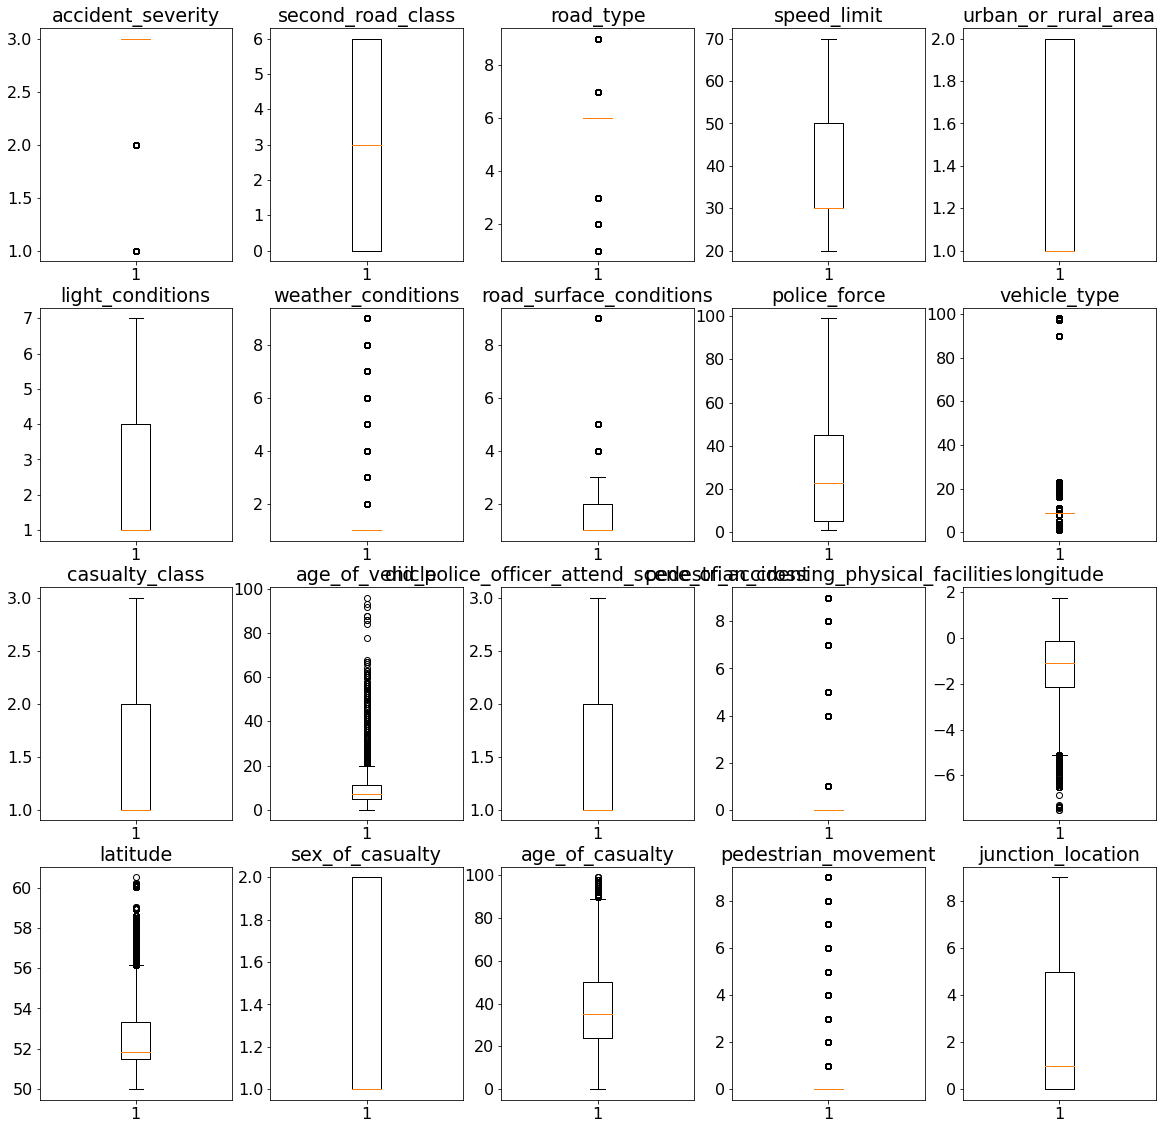

In [259]:
# outlier detection using boxplot

plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_data):
    plt.subplot(6, 5, i + 1)
    plt.boxplot(df[variable])
    plt.title(variable)
    
plt.show()

In [260]:
df_new = df.drop('accident_index', axis = 1)

In [261]:
df_new

accident_severity  second_road_class  road_type  speed_limit  \
0                       3                0.0          6         20.0   
1                       3                6.0          6         20.0   
2                       3                6.0          6         20.0   
3                       3                6.0          6         30.0   
4                       2                0.0          6         30.0   
...                   ...                ...        ...          ...   
220430                  2                6.0          6         60.0   
220431                  2                6.0          6         60.0   
220432                  3                6.0          6         30.0   
220433                  3                6.0          6         30.0   
220434                  3                0.0          6         30.0   

        urban_or_rural_area  light_conditions  weather_conditions  \
0                         1               1.0                 9.0   
1                         1               1.0                 1.0   
2                         1               1.0                 1.0   
3                         1               4.0                 1.0   
4                         1               4.0                 1.0   
...                     ...               ...                 ...   
220430                    2               1.0                 1.0   
220431                    2               1.0                 1.0   
220432                    1               1.0                 1.0   
220433                    1               1.0                 1.0   
220434                    1               1.0                 1.0   

        road_surface_conditions junction_control  police_force  ...  \
0                           9.0          unknown             1  ...   
1                           1.0              2.0             1  ...   
2                           1.0              2.0             1  ...   
3                           2.0              1.0             1  ...   
4                           1.0          unknown             1  ...   
...                         ...              ...           ...  ...   
220430                      1.0          unknown            99  ...   
220431                      1.0          unknown            99  ...   
220432                      1.0              4.0            99  ...   
220433                      1.0              4.0            99  ...   
220434                      1.0          unknown            99  ...   

        casualty_class  age_of_vehicle  \
0                    3             6.0   
1                    3             2.0   
2                    3             2.0   
3                    3             7.0   
4                    3             8.0   
...                ...             ...   
220430               1             2.0   
220431               1             2.0   
220432               1             1.0   
220433               1             7.0   
220434               3             2.0   

        did_police_officer_attend_scene_of_accident  \
0                                               3.0   
1                                               1.0   
2                                               1.0   
3                                               1.0   
4                                               1.0   
...                                             ...   
220430                                          1.0   
220431                                          1.0   
220432                                          2.0   
220433                                          2.0   
220434                                          1.0   

        pedestrian_crossing_physical_facilities  longitude   latitude  \
0                                           9.0  -0.254001  51.462262   
1                                           4.0  -0.139253  51.470327   
2                                           4.0  -0.139253  51.470327   
3  

In [262]:
df_new.columns

Index(['accident_severity', 'second_road_class', 'road_type', 'speed_limit',
       'urban_or_rural_area', 'light_conditions', 'weather_conditions',
       'road_surface_conditions', 'junction_control', 'police_force',
       'vehicle_type', 'casualty_class', 'age_of_vehicle',
       'did_police_officer_attend_scene_of_accident',
       'pedestrian_crossing_physical_facilities', 'longitude', 'latitude',
       'sex_of_casualty', 'age_of_casualty', 'pedestrian_movement',
       'junction_location'],
      dtype='object')

In [263]:
# Treating outliers for the numerical columns
def treat_outliers(data, col):
    """
    Treat outliers in a variable.
    col: str, name of the numerical variable
    df: DataFrame
    """
    Q1 = data[col].quantile(0.25)   # lower (25th) quartile
    Q3 = data[col].quantile(0.75)   # upper (75th) quartile
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    data[col] = np.clip(data[col], lower_whisker, upper_whisker)
    return data

def treat_outliers_all(data, col_list):
    """
    This will treat all outliers, looping
    through all the variables and passing them
    into the treat_outliers function.
    """
    for c in col_list:
        data = treat_outliers(data, c)
    return data

In [267]:
treat_outliers_all(df_new, numerical_data)

C:\Users\MR EVANS\anaconda3\lib\site-packages\pandas\core\nanops.py:1723: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)

C:\Users\MR EVANS\anaconda3\lib\site-packages\pandas\core\nanops.py:1723: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)

C:\Users\MR EVANS\anaconda3\lib\site-packages\pandas\core\nanops.py:1723: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)

C:\Users\MR EVANS\anacond

C:\Users\MR EVANS\anaconda3\lib\site-packages\pandas\core\nanops.py:1723: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)



accident_severity  second_road_class  road_type  speed_limit  \
0                     3.0                0.0        6.0         20.0   
1                     3.0                6.0        6.0         20.0   
2                     3.0                6.0        6.0         20.0   
3                     3.0                6.0        6.0         30.0   
4                     3.0                0.0        6.0         30.0   
...                   ...                ...        ...          ...   
220430                3.0                6.0        6.0         60.0   
220431                3.0                6.0        6.0         60.0   
220432                3.0                6.0        6.0         30.0   
220433                3.0                6.0        6.0         30.0   
220434                3.0                0.0        6.0         30.0   

        urban_or_rural_area  light_conditions  weather_conditions  \
0                         1               1.0                 1.0   
1                         1               1.0                 1.0   
2                         1               1.0                 1.0   
3                         1               4.0                 1.0   
4                         1               4.0                 1.0   
...                     ...               ...                 ...   
220430                    2               1.0                 1.0   
220431                    2               1.0                 1.0   
220432                    1               1.0                 1.0   
220433                    1               1.0                 1.0   
220434                    1               1.0                 1.0   

        road_surface_conditions junction_control  police_force  ...  \
0                           3.5          unknown             1  ...   
1                           1.0              2.0             1  ...   
2                           1.0              2.0             1  ...   
3                           2.0              1.0             1  ...   
4                           1.0          unknown             1  ...   
...                         ...              ...           ...  ...   
220430                      1.0          unknown            99  ...   
220431                      1.0          unknown            99  ...   
220432                      1.0              4.0            99  ...   
220433                      1.0              4.0            99  ...   
220434                      1.0          unknown            99  ...   

        casualty_class  age_of_vehicle  \
0                    3             6.0   
1                    3             2.0   
2                    3             2.0   
3                    3             7.0   
4                    3             8.0   
...                ...             ...   
220430               1             2.0   
220431               1             2.0   
220432               1             1.0   
220433               1             7.0   
220434               3             2.0   

        did_police_officer_attend_scene_of_accident  \
0                                               3.0   
1                                               1.0   
2                                               1.0   
3                                               1.0   
4                                               1.0   
...                                             ...   
220430                                          1.0   
220431                                          1.0   
220432                                          2.0   
220433                                          2.0   
220434                                          1.0   

        pedestrian_crossing_physical_facilities  longitude   latitude  \
0                                           0.0  -0.254001  51.462262   
1                                           0.0  -0.139253  51.470327   
2                                           0.0  -0.139253  51.470327   
3  

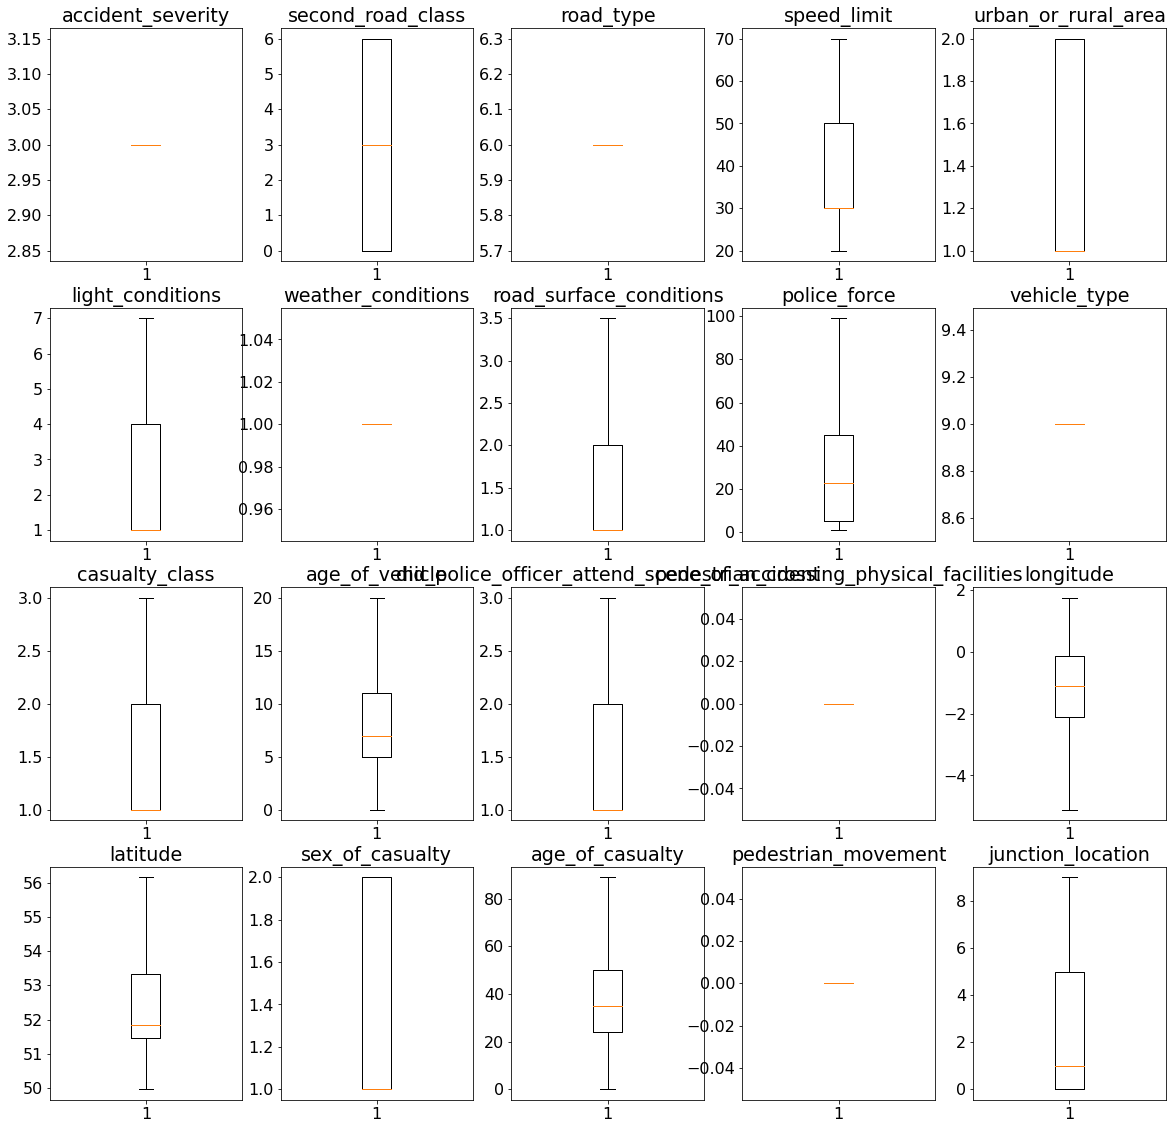

In [268]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_data):
    plt.subplot(6, 5, i + 1)
    plt.boxplot(df_new[variable])
    plt.title(variable)
    
plt.show()

### Random Forest Classification

In [280]:
df

accident_index  accident_severity  second_road_class  road_type  \
0       2020010219808                  3                0.0          6   
1       2020010220496                  3                6.0          6   
2       2020010220496                  3                6.0          6   
3       2020010228005                  3                6.0          6   
4       2020010228006                  2                0.0          6   
...               ...                ...                ...        ...   
220430  2020991030297                  2                6.0          6   
220431  2020991030297                  2                6.0          6   
220432  2020991030900                  3                6.0          6   
220433  2020991030900                  3                6.0          6   
220434  2020991032575                  3                0.0          6   

        speed_limit  urban_or_rural_area  light_conditions  \
0              20.0                    1               1.0   
1              20.0                    1               1.0   
2              20.0                    1               1.0   
3              30.0                    1               4.0   
4              30.0                    1               4.0   
...             ...                  ...               ...   
220430         60.0                    2               1.0   
220431         60.0                    2               1.0   
220432         30.0                    1               1.0   
220433         30.0                    1               1.0   
220434         30.0                    1               1.0   

        weather_conditions  road_surface_conditions junction_control  ...  \
0                      9.0                      9.0          unknown  ...   
1                      1.0                      1.0              2.0  ...   
2                      1.0                      1.0              2.0  ...   
3                      1.0                      2.0              1.0  ...   
4                      1.0                      1.0          unknown  ...   
...                    ...                      ...              ...  ...   
220430                 1.0                      1.0          unknown  ...   
220431                 1.0                      1.0          unknown  ...   
220432                 1.0                      1.0              4.0  ...   
220433                 1.0                      1.0              4.0  ...   
220434                 1.0                      1.0          unknown  ...   

        casualty_class  age_of_vehicle  \
0                    3             6.0   
1                    3             2.0   
2                    3             2.0   
3                    3             7.0   
4                    3             8.0   
...                ...             ...   
220430               1             2.0   
220431               1             2.0   
220432               1             1.0   
220433               1             7.0   
220434               3             2.0   

        did_police_officer_attend_scene_of_accident  \
0                                               3.0   
1                                               1.0   
2                                               1.0   
3                                               1.0   
4                                               1.0   
...                                             ...   
220430                                          1.0   
220431                                          1.0   
220432                                          2.0   
220433                                          2.0   
220434                                          1.0   

        pedestrian_crossing_physical_facilities  longitude   latitude  \
0                                           9.0  -0.254001  51.462262   
1                                           4.0  -0.139253  51.470327   
2                                           4.0  -0.139253  51.

In [276]:
df.columns

Index(['accident_index', 'accident_severity', 'second_road_class', 'road_type',
       'speed_limit', 'urban_or_rural_area', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'junction_control',
       'police_force', 'vehicle_type', 'casualty_class', 'age_of_vehicle',
       'did_police_officer_attend_scene_of_accident',
       'pedestrian_crossing_physical_facilities', 'longitude', 'latitude',
       'sex_of_casualty', 'age_of_casualty', 'pedestrian_movement',
       'junction_location'],
      dtype='object')

In [271]:
df.accident_severity.value_counts()

3    165906
2     43285
1      4059
Name: accident_severity, dtype: int64

In [273]:
dff = df.copy()

In [281]:
dff = dff.drop('accident_index', axis=1)

In [284]:
dff.accident_severity.value_counts()

0    209191
1      4059
Name: accident_severity, dtype: int64

In [282]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [283]:
# Combine 'Serious' and 'Slight' into 'Non-Fatal'
dff['accident_severity'] = dff['accident_severity'].apply(lambda x: 0 if x != 1 else 1)

In [285]:
# Select the features and target
x = dff.drop(['accident_severity', 'junction_control'], axis = 1)
y = dff.accident_severity

In [286]:
# Split the data into training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, shuffle=True, random_state=0)

In [287]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [288]:
# Predict on the test data
y_pred = clf.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print a detailed classification report
report = classification_report(y_test, y_pred, target_names=['Non-Fatal', 'Fatal'])
print(report)

Accuracy: 98.87%
              precision    recall  f1-score   support

   Non-Fatal       0.99      1.00      0.99     41838
       Fatal       0.99      0.41      0.58       812

    accuracy                           0.99     42650
   macro avg       0.99      0.70      0.79     42650
weighted avg       0.99      0.99      0.99     42650



In [291]:
# Get feature importances
importances = clf.feature_importances_

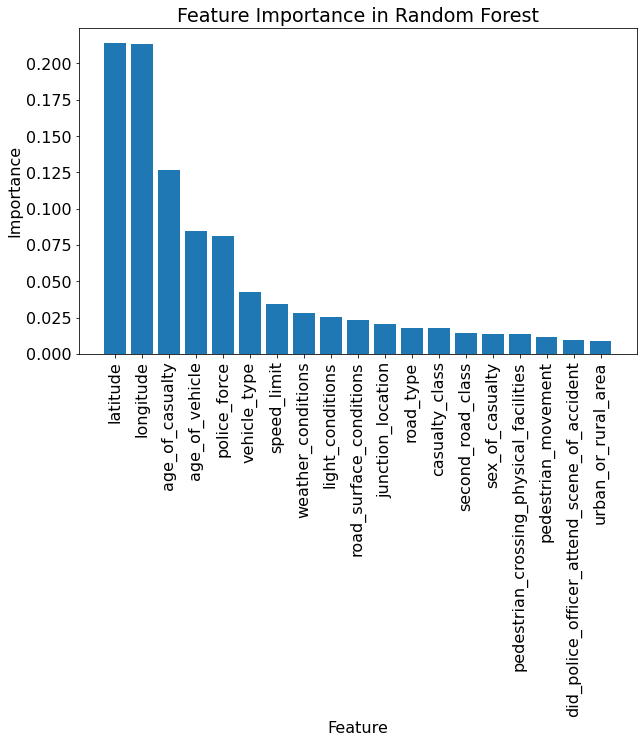

In [326]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x.columns[i] for i in indices]

# Create a plot
plt.figure(figsize=(10, 6))

# Create a bar chart
plt.bar(range(x.shape[1]), importances[indices])

# Add labels to the chart
plt.xticks(range(x.shape[1]), names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')

# Show the plot
plt.savefig('features.png')
plt.show()

In [293]:
from imblearn.over_sampling import SMOTE

In [294]:
# create an instance of the SMOTE
smote = SMOTE(random_state=0)

In [295]:
x_smote, y_smote = smote.fit_resample(x, y)

In [296]:
y_smote.value_counts()

0    209191
1    209191
Name: accident_severity, dtype: int64

In [327]:
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote, y_smote, test_size=0.2, 
                                                                            shuffle=True, random_state=0)

In [328]:
# Create a Random Forest Classifier
clf_df = RandomForestClassifier(random_state=42)

# Train the classifier
clf_df.fit(x_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [329]:
# Predict on the test data
y_pred = clf_df.predict(x_test_smote)

# Calculate the accuracy
accuracy = accuracy_score(y_test_smote, y_pred)
print(f'Model Accuracy is: {accuracy * 100:.2f}%')

# Print a detailed classification report
report = classification_report(y_test_smote, y_pred, target_names=['Non-Fatal', 'Fatal'])
print(report)

Accuracy: 99.69%
              precision    recall  f1-score   support

   Non-Fatal       1.00      1.00      1.00     41998
       Fatal       1.00      1.00      1.00     41679

    accuracy                           1.00     83677
   macro avg       1.00      1.00      1.00     83677
weighted avg       1.00      1.00      1.00     83677

